In [1]:
# ---------------- #
# Common Libraries #
# ---------------- #
      
# Standard Imports
import os
import re
import nltk
import requests
import unicodedata
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## setting basic style parameters for matplotlib
plt.rc('figure', figsize=(20, 10))
plt.style.use('seaborn-darkgrid')

# ------------- #
# LOCAL IMPORTS #
# ------------- #

# importing sys
import sys
# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')
# env containing sensitive access credentials
import env
from env import user, password, host
from env import get_db_url

# Import Local Helper Modules
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acq
import QMCBT_02_prepare as prep
import QMCBT_03_explore as exp
import QMCBT_04_visualize as viz
import QMCBT_05_model as mod
import QMCBT_wrangle as w

# Import py modules
import prepare as p

In [2]:
# Read-in data from compressed file
df = pd.read_pickle('michelin_df.pickle')

In [3]:
# Display DataFrame
df.T.head(20)

0     \
name                                                            King's Joy   
address                        2 Wudaoying Hutong, Beijing, China Mainland   
location                                           Beijing, China Mainland   
price                                                                  ¥¥¥   
cuisine                                                         Vegetarian   
longitude                                                       116.410004   
latitude                                                         39.946681   
phone_number                                                861084049191.0   
url                      https://guide.michelin.com/en/beijing-municipa...   
website_url                                                            NaN   
award                                                     3 MICHELIN Stars   
facilities_and_services  Air conditioning,American Express credit card,...   
data                     Just a stone’s throw from Yonghe Temple, this ...   

                                                                      1     \
name                                      Xin Rong Ji (Xinyuan South Road)   
address                  1F, East Tower, Genesis Beijing, 8 Xinyuan Sou...   
location                                           Beijing, China Mainland   
price                                                                 ¥¥¥¥   
cuisine                                                            Taizhou   
longitude                                                       116.450148   
latitude                                                          39.94638   
phone_number                                                861065015501.0   
url                      https://guide.michelin.com/en/beijing-municipa...   
website_url                                                            NaN   
award                                                     3 MICHELIN Stars   
facilities_and_services  Air conditioning,Car park,China UnionPay,Count...   
data                     This branch of the chain restaurant opened in ...   

                                                                      2     \
name                                                           Taian Table   
address                  101-102, Building No. 1, Garden Office, No.161...   
location                                          Shanghai, China Mainland   
price                                                                 ¥¥¥¥   
cuisine                                                         Innovative   
longitude                                                       121.474049   
latitude                                                         31.221807   
phone_number                                               8617301605350.0   
url                      https://guide.michelin.com/en/shanghai-municip...   
website_url                                        https://taian-table.cn/   
award                                                     3 MICHELIN Stars   
facilities_and_services  Air conditioning,American Express credit card,...   
data                     A fixture on the city’s dining scene since 201...   

                                                                      3     \
name                                            Ultraviolet by Paul Pairet   
address                  'somewhere in Shanghai' - meet at Mr & Mrs Bun...   
location                                          Shanghai, China Mainland   
price                                                                 ¥¥¥¥   
cuisine                                                         Innovative   
longitude                                                        121.48509   
latitude                                                         31.240358   
phone_number                                                           NaN   
url                      https://guide.michelin.com/en/shanghai-municip...   
website_url

In [4]:
# Split data
train, validate, test = p.prepare_michelin(df)

In [235]:
# Display Split Ratios
round(train.shape[0]/df.shape[0],2),round(validate.shape[0]/df.shape[0],2),round(test.shape[0]/df.shape[0],2)

(0.56, 0.24, 0.2)

In [5]:
# Display all columns on the y axis
train.T.head(20)

6345  \
name                                                     gasthaus ödenturm   
address                               am ödenturm 11, cham, 93413, germany   
location                                                     cham, germany   
price                                                                    €   
cuisine                             country cooking, mediterranean cuisine   
longitude                                                        12.703851   
latitude                                                         49.210919   
url                      https://guide.michelin.com/en/bayern/cham/rest...   
award                                                         bib gourmand   
facilities_and_services  car park,credit card / debit card accepted,gre...   
data                     as if straight out of a picture book, this bea...   
price_level                                                              1   
city                                                                  cham   
country                                                            germany   
clean                    straight picture book beautiful inn stands edg...   
lemmatized               straight picture book beautiful inn stand edge...   
word_count                                                              38   

                                                                      6427  \
name                                                        weinhaus anker   
address                  obertorstraße 13, marktheidenfeld, 97828, germany   
location                                          marktheidenfeld, germany   
price                                                                    €   
cuisine                                            french, country cooking   
longitude                                                         9.600301   
latitude                                                         49.845621   
url                      https://guide.michelin.com/en/bayern/marktheid...   
award                                                         bib gourmand   
facilities_and_services  american express credit card,car park,credit c...   
data                     a restaurant that is steeped in tradition and ...   
price_level                                                              1   
city                                                       marktheidenfeld   
country                                                            germany   
clean                    steeped tradition run great commitment lovely ...   
lemmatized               steeped tradition run great commitment lovely ...   
word_count                                                              35   

                                                                      5217  \
name                                                 yang bao bao (nanzih)   
address                  106 chaoming road, nanzih district, kaohsiung,...   
location                                      kaohsiung, taipei & taichung   
price                                                                    $   
cuisine                                                          dumplings   
longitude                                                        120.32805   
latitude                                                          22.72416   
url                      https://guide.michelin.com/en/kaohsiung-region...   
award                                                         bib gourmand   
facilities_and_services                air conditioning,car park,cash only   
data                     in 1993, this dumpling shop began life as a st...   
price_level                                                              1   
city                                                             kaohsiung   
country                                                  taipei & taichung   
clean                    1993 dumpling shop began life street stall loc...   
lemmatized  

In [6]:
# Display DataFrame information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 6345 to 4981
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     3793 non-null   string 
 1   address                  3793 non-null   string 
 2   location                 3793 non-null   string 
 3   price                    3793 non-null   object 
 4   cuisine                  3793 non-null   string 
 5   longitude                3793 non-null   float64
 6   latitude                 3793 non-null   float64
 7   url                      3793 non-null   object 
 8   award                    3793 non-null   string 
 9   facilities_and_services  3793 non-null   string 
 10  data                     3793 non-null   string 
 11  price_level              3793 non-null   int64  
 12  city                     3793 non-null   object 
 13  country                  3793 non-null   object 
 14  clean                

<div class="alert alert-info">

# Observations
* Dropping all nulls would remove 1336 documents (~135 documents have >1 Null)  

                          price:   54 Nulls
                   phone_number:  131 Nulls
                    website_url: 1238 Nulls
        facilities_and_services:   48 Nulls

* facilities_and_services nunique is 1571 

        * there are only 120 documents that share values with 10 or more other documents
        * there are 540 documents that share values with 2-9 other documents
        * there are 910 documents that are entirely unique

* There are only 16 locations that have more than 50 documents (awardees) and only half of those contain more than 100 documents  

        * Tokyo, Japan                    422
        * Kyoto, Japan                    196
        * Osaka, Japan                    193
        * New York, USA                   177
        * Paris, France                   164
        * Hong Kong                       135
        * Singapore                       119
        * London, United Kingdom          104
        * Bangkok, Thailand               103

* There are 863 unique cuisine values; 26 cuisine types that have more than 50 documents and only 9 that have more than 100 documents; 445 unique cuisine type combinations have only one document.  
        
        * Modern Cuisine              994
        * Creative                    416
        * Japanese                    287
        * Traditional Cuisine         218
        * French                      184
        * Street Food                 157
        * Italian                     130
        * Contemporary                114
        * Cantonese                   112

* There are four different award types  

        * Bib Gourmand        3411
        * 1 MICHELIN Star     2744
        * 2 MICHELIN Stars     483
        * 3 MICHELIN Stars     142

# Clean
### DTYPE & IMPUTE
* Cast facilities_and_services astype('string') and fillna('NONE')
* Cast data astype('string')

# Feature Engineer
* NON-MVP Option - Create buckets and encode locations and cuisine
* Encode award 
* Use facilities_and_services as a feature
* IMPUTE prce with len and encode


In [7]:
# Display count of unique entries
train.facilities_and_services.nunique()

1134

In [8]:
# Show aggregated value counts
train.facilities_and_services.value_counts().head(435)

air conditioning,american express credit card,...    173
cash only                                             96
air conditioning,credit card / debit card acce...     77
air conditioning,american express credit card,...     72
air conditioning,cash only,counter dining             68
                                                    ... 
air conditioning,american express credit card,...      1
air conditioning,car park,counter dining,credi...      1
air conditioning,brunch,counter dining,credit ...      1
air conditioning,american express credit card,...      1
air conditioning,american express credit card,...      1
Name: facilities_and_services, Length: 435, dtype: Int64

## Award & Price Comparisons 

In [9]:
# Award Counts
train.award.value_counts()

bib gourmand        1908
1 michelin star     1536
2 michelin stars     270
3 michelin stars      79
Name: award, dtype: Int64

In [10]:
# Award Percentages
print(f'Bib Gourmand: {1910/3796}')
print(f'      1-Star: {1536/3796}')
print(f'      2-Star: {270/3796}')
print(f'      3-Star: {80/3796}')

Bib Gourmand: 0.5031612223393045
      1-Star: 0.40463645943098
      2-Star: 0.07112750263435196
      3-Star: 0.02107481559536354


In [11]:
# Price Count
train.price_level.value_counts()

2    1361
4    1022
3     815
1     595
Name: price_level, dtype: int64

In [12]:
# Price Percentages
print(f'Price Level 1: {583/3796}')
print(f'Price Level 2: {1373/3796}')
print(f'Price Level 3: {815/3796}')
print(f'Price Level 4: {1025/3796}')

Price Level 1: 0.1535827186512118
Price Level 2: 0.3616965226554268
Price Level 3: 0.21469968387776606
Price Level 4: 0.27002107481559534


#### Bib Gourmand

In [13]:
# Bib Gourmand Price Count
train.price_level[train.award == 'bib gourmand'].value_counts()

2    1286
1     594
3      27
4       1
Name: price_level, dtype: int64

In [14]:
# Price Percentages
print(f'Bib Gourmand Price Level 1: {1300/1373}')
print(f'Bib Gourmand Price Level 2: {580/583}')
print(f'Bib Gourmand Price Level 3: {29/815}')
print(f'Bib Gourmand Price Level 4: {1/1025}')
print('------------------------------------------------------------------')
print(f'Bib Gourmand Percentage of Total: {(1300+580+29+1)/(1373+583+815+1025)}')

Bib Gourmand Price Level 1: 0.9468317552804079
Bib Gourmand Price Level 2: 0.9948542024013722
Bib Gourmand Price Level 3: 0.03558282208588957
Bib Gourmand Price Level 4: 0.000975609756097561
------------------------------------------------------------------
Bib Gourmand Percentage of Total: 0.5031612223393045


#### 1-Star

In [15]:
# Price Count
train.price_level[train.award == '1 michelin star'].value_counts()

3    749
4    716
2     70
1      1
Name: price_level, dtype: int64

In [16]:
# Price Percentages
print(f'1 Star Price Level 1: {3/1373}')
print(f'1 Star Price Level 2: {67/583}')
print(f'1 Star Price Level 3: {747/815}')
print(f'1 Star Price Level 4: {719/1025}')
print('------------------------------------------------------------------')
print(f'1 Star Percentage of Total: {(3+67+747+719)/(1373+583+815+1025)}')

1 Star Price Level 1: 0.0021849963583394027
1 Star Price Level 2: 0.11492281303602059
1 Star Price Level 3: 0.9165644171779141
1 Star Price Level 4: 0.7014634146341463
------------------------------------------------------------------
1 Star Percentage of Total: 0.40463645943098


#### 2-Star

In [17]:
# Price Count
train.price_level[train.award == '2 michelin stars'].value_counts()

4    230
3     35
2      5
Name: price_level, dtype: int64

In [18]:
# Price Percentages
print(f'2 Star Price Level 1: {0/1373}')
print(f'2 Star Price Level 2: {6/583}')
print(f'2 Star Price Level 3: {35/815}')
print(f'2 Star Price Level 4: {229/1025}')
print('------------------------------------------------------------------')
print(f'2 Star Percentage of Total: {(0+6+35+229)/(1373+583+815+1025)}')

2 Star Price Level 1: 0.0
2 Star Price Level 2: 0.010291595197255575
2 Star Price Level 3: 0.04294478527607362
2 Star Price Level 4: 0.22341463414634147
------------------------------------------------------------------
2 Star Percentage of Total: 0.07112750263435196


#### 3-Star

In [19]:
# Price Count
train.price_level[train.award == '3 michelin stars'].value_counts()

4    75
3     4
Name: price_level, dtype: int64

In [20]:
# Price Percentages
print(f'3 Star Price Level 1: {0/1373}')
print(f'3 Star Price Level 2: {0/583}')
print(f'3 Star Price Level 3: {4/815}')
print(f'3 Star Price Level 4: {76/1025}')
print('------------------------------------------------------------------')
print(f'3 Star Percentage of Total: {(0+0+4+76)/(1373+583+815+1025)}')

3 Star Price Level 1: 0.0
3 Star Price Level 2: 0.0
3 Star Price Level 3: 0.0049079754601227
3 Star Price Level 4: 0.07414634146341463
------------------------------------------------------------------
3 Star Percentage of Total: 0.02107481559536354


## Cuisine

In [21]:
# How many unique cuisine values are there?
train.cuisine.nunique()

630

In [22]:
# cuisine counts > 50
train.cuisine.value_counts().head(11)

modern cuisine              568
creative                    238
japanese                    165
traditional cuisine         118
french                      107
street food                 101
italian                      74
contemporary                 73
cantonese                    55
classic cuisine              51
creative, modern cuisine     50
Name: cuisine, dtype: Int64

## Locations

In [23]:
# Unique of locations
train.location.nunique()

1685

In [24]:
# location counts > 50
train.location.value_counts().head(11)

tokyo, japan                 246
kyoto, japan                 107
osaka, japan                  99
new york, usa                 98
paris, france                 89
hong kong                     71
singapore                     70
bangkok, thailand             53
london, united kingdom        53
taipei, taipei & taichung     51
seoul, south korea            49
Name: location, dtype: Int64

In [25]:
# Country Count
train.country.nunique()

41

In [26]:
# Country List
train.country.unique()

array(['germany', 'taipei & taichung', 'spain', 'united kingdom',
       'china mainland', 'italy', 'usa', 'belgium', 'japan', 'france',
       'switzerland', 'netherlands', 'brazil', 'macau', 'canada',
       'thailand', 'hong kong', 'malaysia', 'dubai', 'portugal',
       'austria', 'ireland', 'norway', 'croatia', 'south korea', 'poland',
       'singapore', 'denmark', 'czech republic', 'greece', 'hungary',
       'slovenia', 'türkiye', 'malta', 'luxembourg', 'estonia', 'sweden',
       'finland', 'iceland', 'abu dhabi', 'andorra'], dtype=object)

In [27]:
# Award Count by Country >50
train.country.value_counts().head(16)

france               573
japan                474
italy                385
usa                  336
germany              335
spain                285
switzerland          151
belgium              143
united kingdom       142
netherlands          128
china mainland       121
thailand             121
taipei & taichung     99
hong kong             71
singapore             70
south korea           49
Name: country, dtype: int64

#### 1. France (584 awards)

In [28]:
# Award Count by Country
train.award[train.country == 'france'].value_counts()

1 michelin star     277
bib gourmand        239
2 michelin stars     42
3 michelin stars     15
Name: award, dtype: Int64

In [29]:
# Price Count by Country
train.price_level[train.country == 'france'].value_counts()

4    201
2    195
3    136
1     41
Name: price_level, dtype: int64

In [30]:
# Cuisine Count by Country
train.cuisine[train.country == 'france'].value_counts().head()

modern cuisine              302
creative                     80
traditional cuisine          46
classic cuisine              17
creative, modern cuisine     15
Name: cuisine, dtype: Int64

#### 2. Japan (434 awards)

In [31]:
# Award Count by Country
train.award[train.country == 'japan'].value_counts()

bib gourmand        240
1 michelin star     176
2 michelin stars     45
3 michelin stars     13
Name: award, dtype: Int64

In [32]:
# Price Count by Country
train.price_level[train.country == 'japan'].value_counts()

3    166
2    144
1    106
4     58
Name: price_level, dtype: int64

In [33]:
# Cuisine Count by Country
train.cuisine[train.country == 'japan'].value_counts().head()

japanese    124
french       73
sushi        40
italian      26
soba         25
Name: cuisine, dtype: Int64

#### 3. USA (364 awards)

In [34]:
# Award Count by Country
train.award[train.country == 'usa'].value_counts()

bib gourmand        208
1 michelin star     104
2 michelin stars     17
3 michelin stars      7
Name: award, dtype: Int64

In [35]:
# Price Count by Country
train.price_level[train.country == 'usa'].value_counts()

2    179
4    107
1     25
3     25
Name: price_level, dtype: int64

In [36]:
# Cuisine Count by Country
train.cuisine[train.country == 'usa'].value_counts().head()

japanese, sushi              21
contemporary                 21
mexican                      12
mexican, regional cuisine    10
californian                  10
Name: cuisine, dtype: Int64

#### 4. Italy (356 awards)

In [37]:
# Award Count by Country
train.award[train.country == 'italy'].value_counts()

1 michelin star     212
bib gourmand        149
2 michelin stars     17
3 michelin stars      7
Name: award, dtype: Int64

In [38]:
# Price Count by Country
train.price_level[train.country == 'italy'].value_counts()

4    136
3     97
1     86
2     66
Name: price_level, dtype: int64

In [39]:
# Cuisine Count by Country
train.cuisine[train.country == 'italy'].value_counts().head()

modern cuisine            49
creative                  33
creative, contemporary    22
seafood                   15
piedmontese               14
Name: cuisine, dtype: Int64

#### 5. Germany (330 awards)

In [40]:
# Award Count by Country
train.award[train.country == 'germany'].value_counts()

bib gourmand        167
1 michelin star     135
2 michelin stars     26
3 michelin stars      7
Name: award, dtype: Int64

In [41]:
# Price Count by Country
train.price_level[train.country == 'germany'].value_counts()

2    133
4    121
3     48
1     33
Name: price_level, dtype: int64

In [42]:
# Cuisine Count by Country
train.cuisine[train.country == 'germany'].value_counts().head()

country cooking, market cuisine         24
country cooking                         16
creative, modern cuisine                14
market cuisine, country cooking         13
country cooking, traditional cuisine    12
Name: cuisine, dtype: Int64

In [43]:
# Create Country DataFrame
award_counts = pd.concat([train.award.value_counts(),
                         train.award[train.country == 'france'].value_counts(),
                         train.award[train.country == 'japan'].value_counts(), 
                         train.award[train.country == 'usa'].value_counts(),
                         train.award[train.country == 'italy'].value_counts(),
                         train.award[train.country == 'germany'].value_counts()
                         ], axis=1
                         ).fillna(0).astype(int)

award_counts.columns = ['All',
                         'France',
                         'Japan', 
                         'USA',
                         'Italy',
                         'Germany'
                         ]

award_counts

All  France  Japan  USA  Italy  Germany
bib gourmand      1908     239    240  208    149      167
1 michelin star   1536     277    176  104    212      135
2 michelin stars   270      42     45   17     17       26
3 michelin stars    79      15     13    7      7        7

In [44]:
# Show percentage of 'all'
award_counts.sort_values('USA', ascending=False)\
    .head(4)\
    .apply(lambda row: row/row['All'], axis = 1)

All    France     Japan       USA     Italy   Germany
bib gourmand      1.0  0.125262  0.125786  0.109015  0.078092  0.087526
1 michelin star   1.0  0.180339  0.114583  0.067708  0.138021  0.087891
2 michelin stars  1.0  0.155556  0.166667  0.062963  0.062963  0.096296
3 michelin stars  1.0  0.189873  0.164557  0.088608  0.088608  0.088608

In [45]:
# Create Country DataFrame
price_counts = pd.concat([train.price_level.value_counts(),
                         train.price_level[train.country == 'france'].value_counts(),
                         train.price_level[train.country == 'japan'].value_counts(), 
                         train.price_level[train.country == 'usa'].value_counts(),
                         train.price_level[train.country == 'italy'].value_counts(),
                         train.price_level[train.country == 'germany'].value_counts()
                         ], axis=1
                         ).fillna(0).astype(int)

price_counts.columns = ['All',
                         'France',
                         'Japan', 
                         'USA',
                         'Italy',
                         'Germany'
                         ]

price_counts.sort_values('USA', ascending=False)

All  France  Japan  USA  Italy  Germany
2  1361     195    144  179     66      133
4  1022     201     58  107    136      121
3   815     136    166   25     97       48
1   595      41    106   25     86       33

In [46]:
# Show percentage of 'all'
price_counts.sort_values('USA', ascending=False)\
    .head(4)\
    .apply(lambda row: row/row['All'], axis = 1)

All    France     Japan       USA     Italy   Germany
2  1.0  0.143277  0.105805  0.131521  0.048494  0.097722
4  1.0  0.196673  0.056751  0.104697  0.133072  0.118395
3  1.0  0.166871  0.203681  0.030675  0.119018  0.058896
1  1.0  0.068908  0.178151  0.042017  0.144538  0.055462

In [135]:
fig = px.treemap(train, title='Treemap chart by country and word count colored by award type.',
                 path=['country', 'word_count'], color='award', color_continuous_scale=px.colors.sequential.GnBu)
fig.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### Reviews

In [47]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the  function with a join
all_reviews = (' '.join(train['lemmatized']))
one_star_reviews = (' '.join(train[train.award == '1 michelin star']['lemmatized']))
two_star_reviews = (' '.join(train[train.award == '2 michelin stars']['lemmatized']))
three_star_reviews = (' '.join(train[train.award == '3 michelin stars']['lemmatized']))
bib_gourmand_reviews = (' '.join(train[train.award == 'bib gourmand']['lemmatized']))

In [49]:
#TODO Create Mean Word Count

In [50]:
# show word count
print('Reviews Word Counts')
print(f'all_reviews: {len(all_reviews)}')
print(f'one_star_reviews: {len(one_star_reviews)}')
print(f'two_star_reviews: {len(two_star_reviews)}')
print(f'three_star_reviews: {len(three_star_reviews)}')
print(f'bib_gourmand_reviews: {len(bib_gourmand_reviews)}')

Reviews Word Counts
all_reviews: 1400248
one_star_reviews: 669572
two_star_reviews: 119526
three_star_reviews: 37836
bib_gourmand_reviews: 573311


In [51]:
all_reviews_words = all_reviews.split()
one_star_reviews_words = one_star_reviews.split()
two_star_reviews_words = two_star_reviews.split()
three_star_reviews_words = three_star_reviews.split()
bib_gourmand_reviews_words = bib_gourmand_reviews.split()

In [52]:
# Assign word counts to Frequency Variables
freq_one_star_reviews = pd.Series(one_star_reviews_words).value_counts()
freq_two_star_reviews = pd.Series(two_star_reviews_words).value_counts()
freq_three_star_reviews = pd.Series(three_star_reviews_words).value_counts()
freq_bib_gourmand_reviews = pd.Series(bib_gourmand_reviews_words).value_counts()
freq_all_reviews = pd.Series(all_reviews_words).value_counts()

### Facilities

In [53]:
from typing import List, Union, Tuple

def prepare_facilities(df: pd.DataFrame,
                     split: bool = True) -> Union[pd.DataFrame,
                                                  Tuple[pd.DataFrame,
                                                        pd.DataFrame,
                                                        pd.DataFrame]]:
    '''
    Prepares Michelin DataFrame
    ## Parameters
    df: `DataFrame` with Michelin data
    split: Boolean for whether or not to split the data, default True
    ## Returns
    either a DataFrame or a tuple of the Train, Validate, and Test
    `DataFrame`
    '''
    df = p.create_features(df)
    df = p.change_dtype_str(df)
    df = pd.concat([df, p.process_nl(df.facilities_and_services)], axis=1)
    if split:
        return p.tvt_split(df, stratify='award')
    return df

In [54]:
f_train, f_validate, f_test = prepare_facilities(df)

In [ ]:
f_train['word_count'] = f_train.lemmatized.str.split().apply(len)


In [55]:
f_train.T.head(20)

6345  \
name                                                     gasthaus ödenturm   
address                               am ödenturm 11, cham, 93413, germany   
location                                                     cham, germany   
price                                                                    €   
cuisine                             country cooking, mediterranean cuisine   
longitude                                                        12.703851   
latitude                                                         49.210919   
url                      https://guide.michelin.com/en/bayern/cham/rest...   
award                                                         bib gourmand   
facilities_and_services  car park,credit card / debit card accepted,gre...   
data                     as if straight out of a picture book, this bea...   
price_level                                                              1   
city                                                                  cham   
country                                                            germany   
clean                    car parkcredit card debit card acceptedgreat v...   
lemmatized               car parkcredit card debit card acceptedgreat v...   

                                                                      6427  \
name                                                        weinhaus anker   
address                  obertorstraße 13, marktheidenfeld, 97828, germany   
location                                          marktheidenfeld, germany   
price                                                                    €   
cuisine                                            french, country cooking   
longitude                                                         9.600301   
latitude                                                         49.845621   
url                      https://guide.michelin.com/en/bayern/marktheid...   
award                                                         bib gourmand   
facilities_and_services  american express credit card,car park,credit c...   
data                     a restaurant that is steeped in tradition and ...   
price_level                                                              1   
city                                                       marktheidenfeld   
country                                                            germany   
clean                    american express credit cardcar parkcredit car...   
lemmatized               american express credit cardcar parkcredit car...   

                                                                      5217  \
name                                                 yang bao bao (nanzih)   
address                  106 chaoming road, nanzih district, kaohsiung,...   
location                                      kaohsiung, taipei & taichung   
price                                                                    $   
cuisine                                                          dumplings   
longitude                                                        120.32805   
latitude                                                          22.72416   
url                      https://guide.michelin.com/en/kaohsiung-region...   
award                                                         bib gourmand   
facilities_and_services                air conditioning,car park,cash only   
data                     in 1993, this dumpling shop began life as a st...   
price_level                                                              1   
city                                                             kaohsiung   
country                                                  taipei & taichung   
clean                                         air conditioningcar parkcash   
lemmatized                                    air conditioningcar parkcash   

                                                                      3858  \
name       

In [56]:
f_train.award.value_counts()

bib gourmand        1908
1 michelin star     1536
2 michelin stars     270
3 michelin stars      79
Name: award, dtype: Int64

In [57]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the clean function with a join
all_facilities = ' '.join(f_train['lemmatized'])
one_star_facilities = ' '.join(f_train[f_train.award == '1 michelin star']['lemmatized'])
two_star_facilities = ' '.join(f_train[f_train.award == '2 michelin stars']['lemmatized'])
three_star_facilities = ' '.join(f_train[f_train.award == '3 michelin stars']['lemmatized'])
bib_gourmand_facilities = ' '.join(f_train[f_train.award == 'bib gourmand']['lemmatized'])

In [58]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the clean function with a join
all_facilities_words = all_facilities.split()
one_star_facilities_words = one_star_facilities.split()
two_star_facilities_words = two_star_facilities.split()
three_star_facilities_words = three_star_facilities.split()
bib_gourmand_facilities_words = bib_gourmand_facilities.split()

In [59]:
# show word count
print('Facility Word Counts')
print(f'all_facilities: {len(all_facilities)}')
print(f'one_star_facilities: {len(one_star_facilities)}')
print(f'two_star_facilities: {len(two_star_facilities)}')
print(f'three_star_facilities: {len(three_star_facilities)}')
print(f'bib_gourmand_facilities: {len(bib_gourmand_facilities)}')

Facility Word Counts
all_facilities: 474952
one_star_facilities: 228716
two_star_facilities: 45940
three_star_facilities: 14571
bib_gourmand_facilities: 185722


In [60]:
# Assign word counts to Frequency Variables
freq_one_star_facilities = pd.Series(one_star_facilities_words).value_counts()
freq_two_star_facilities = pd.Series(two_star_facilities_words).value_counts()
freq_three_star_facilities = pd.Series(three_star_facilities_words).value_counts()
freq_bib_gourmand_facilities = pd.Series(bib_gourmand_facilities_words).value_counts()
freq_all_facilities = pd.Series(all_facilities_words).value_counts()

In [61]:
# Create Frequency DataFrame
word_counts = pd.concat([freq_all_facilities,
                         freq_one_star_facilities, 
                         freq_two_star_facilities,
                         freq_three_star_facilities,
                         freq_bib_gourmand_facilities,
                         freq_all_reviews,
                         freq_one_star_reviews,
                         freq_two_star_reviews,
                         freq_three_star_reviews,
                         freq_bib_gourmand_reviews], axis=1
         ).fillna(0).astype(int)

word_counts.columns = ['all_facilities',
                         'one_star_facilities', 
                         'two_star_facilities',
                         'three_star_facilities',
                         'bib_gourmand_facilities',
                         'all_reviews',
                         'one_star_reviews',
                         'two_star_reviews',
                         'three_star_reviews',
                         'bib_gourmand_reviews']

word_counts

all_facilities  one_star_facilities  two_star_facilities  \
credit                   9624                 4588                  841   
card                     8754                 3872                  643   
debit                    3322                 1481                  255   
air                      2579                 1144                  226   
express                  2201                 1163                  229   
...                       ...                  ...                  ...   
sumacflecked                0                    0                    0   
falafelspiced               0                    0                    0   
dukkah                      0                    0                    0   
cobia                       0                    0                    0   
200g                        0                    0                    0   

               three_star_facilities  bib_gourmand_facilities  all_reviews  \
credit                           259                     3936            2   
card                             197                     4042            5   
debit                             78                     1508            0   
air                               70                     1139           33   
express                           72                      737           27   
...                              ...                      ...          ...   
sumacflecked                       0                        0            1   
falafelspiced                      0                        0            1   
dukkah                             0                        0            1   
cobia                              0                        0            1   
200g                               0                        0            1   

               one_star_reviews  two_star_reviews  three_star_reviews  \
credit                        1                 0                   0   
card                          2                 2                   0   
debit                         0                 0                   0   
air                          14                 2                   1   
express                      13                 4                   3   
...                         ...               ...                 ...   
sumacflecked                  0                 0                   0   
falafelspiced                 0                 0                   0   
dukkah                        0                 0                   0   
cobia                         0                 0                   0   
200g                          0                 0                   0   

               bib_gourmand_reviews  
credit                            1  
card                              1  
debit                             0  
air                              16  
express                           7  
...                             ...  
sumacflecked                      1  
falafelspiced                     1  
dukkah                            1  
cobia                             1  
200g                              1  

[22556 rows x 10 columns]

In [62]:
# Show percentage of 'all' for 1-Star Facilities
word_counts.sort_values('three_star_facilities', ascending=False)\
    .head(20)\
    .apply(lambda row: row/row['all_facilities'], axis = 1)

all_facilities  one_star_facilities  \
credit                           1.0             0.476725   
card                             1.0             0.442312   
debit                            1.0             0.445816   
express                          1.0             0.528396   
air                              1.0             0.443583   
interesting                      1.0             0.620042   
wine                             1.0             0.620042   
conditioningamerican             1.0             0.549279   
cardparticularly                 1.0             0.625422   
club                             1.0             0.525510   
accepteddiners                   1.0             0.531020   
access                           1.0             0.482906   
cardwheelchair                   1.0             0.504699   
cardcar                          1.0             0.580332   
parkcredit                       1.0             0.480159   
listvisa                         1.0             0.614555   
acceptedmastercard               1.0             0.397004   
cardcredit                       1.0             0.520291   
vegetarian                       1.0             0.530686   
offering                         1.0             0.530686   

                      two_star_facilities  three_star_facilities  \
credit                           0.087386               0.026912   
card                             0.073452               0.022504   
debit                            0.076761               0.023480   
express                          0.104044               0.032712   
air                              0.087631               0.027142   
interesting                      0.187891               0.069937   
wine                             0.187891               0.069937   
conditioningamerican             0.115385               0.038462   
cardparticularly                 0.186727               0.069741   
club                             0.109184               0.039796   
accepteddiners                   0.110410               0.041009   
access                           0.110256               0.032479   
cardwheelchair                   0.113722               0.031015   
cardcar                          0.124654               0.042936   
parkcredit                       0.085317               0.029762   
listvisa                         0.215633               0.070081   
acceptedmastercard               0.054307               0.014981   
cardcredit                       0.085328               0.023933   
vegetarian                       0.119134               0.041516   
offering                         0.119134               0.041516   

                      bib_gourmand_facilities  all_reviews  one_star_reviews  \
credit                               0.408978     0.000208          0.000104   
card                                 0.461732     0.000571          0.000228   
debit                                0.453943     0.000000          0.000000   
express                              0.334848     0.012267          0.005906   
air                                  0.441644     0.012796          0.005428   
interesting                          0.122129     0.137787          0.087683   
wine                                 0.122129     0.998956          0.590814   
conditioningamerican                 0.296875     0.000000          0.000000   
cardparticularly                     0.118110     0.000000          0.000000   
club                                 0.325510     0.019388          0.011224   
accepteddiners                       0.317560     0.000000          0.000000   
access                               0.374359     0.005128          0.001709   
cardwheelchair                       0.350564     0.000000          0.000000   
cardcar                              0.252078     0.000000          0.000000   
parkcredit                           0.404762     0.000000          0.000000   
listvisa                       

In [63]:
# Show percentage of 'all' for 1-Star reviews
word_counts.sort_values('three_star_reviews', ascending=False)\
    .head(20)\
    .apply(lambda row: row/row['all_reviews'], axis = 1)

all_facilities  one_star_facilities  two_star_facilities  \
dish              0.000000              0.00000             0.000000   
ingredient        0.000000              0.00000             0.000000   
flavour           0.000000              0.00000             0.000000   
service           0.000000              0.00000             0.000000   
'                 0.000000              0.00000             0.000000   
experience        0.000000              0.00000             0.000000   
one               0.000000              0.00000             0.000000   
culinary          0.000000              0.00000             0.000000   
team              0.000000              0.00000             0.000000   
make              0.000000              0.00000             0.000000   
wine              1.001045              0.62069             0.188088   
room              0.000000              0.00000             0.000000   
also              0.000000              0.00000             0.000000   
always            0.000000              0.00000             0.000000   
cooking           0.000000              0.00000             0.000000   
elegant           0.000000              0.00000             0.000000   
setting           0.000000              0.00000             0.000000   
modern            0.000000              0.00000             0.000000   
tasting           0.000000              0.00000             0.000000   
diner             0.000000              0.00000             0.000000   

            three_star_facilities  bib_gourmand_facilities  all_reviews  \
dish                      0.00000                 0.000000          1.0   
ingredient                0.00000                 0.000000          1.0   
flavour                   0.00000                 0.000000          1.0   
service                   0.00000                 0.000000          1.0   
'                         0.00000                 0.000000          1.0   
experience                0.00000                 0.000000          1.0   
one                       0.00000                 0.000000          1.0   
culinary                  0.00000                 0.000000          1.0   
team                      0.00000                 0.000000          1.0   
make                      0.00000                 0.000000          1.0   
wine                      0.07001                 0.122257          1.0   
room                      0.00000                 0.000000          1.0   
also                      0.00000                 0.000000          1.0   
always                    0.00000                 0.000000          1.0   
cooking                   0.00000                 0.000000          1.0   
elegant                   0.00000                 0.000000          1.0   
setting                   0.00000                 0.000000          1.0   
modern                    0.00000                 0.000000          1.0   
tasting                   0.00000                 0.000000          1.0   
diner                     0.00000                 0.000000          1.0   

            one_star_reviews  two_star_reviews  three_star_reviews  \
dish                0.464688          0.085466            0.030194   
ingredient          0.586644          0.104818            0.035503   
flavour             0.512900          0.098039            0.039216   
service             0.535714          0.093750            0.064732   
'                   0.456747          0.129181            0.031142   
experience          0.616972          0.098624            0.061927   
one                 0.550681          0.077156            0.037821   
culinary            0.569892          0.133333            0.053763   
team                0.585052          0.152062            0.051546   
make                0.454158          0.078891            0.038380   
wine                0.591432          0.080460            0.018809   
room                0.494859          0.074550            0.023136   
also         

# VISUALIZATION

In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<Figure size 400x3200 with 0 Axes>

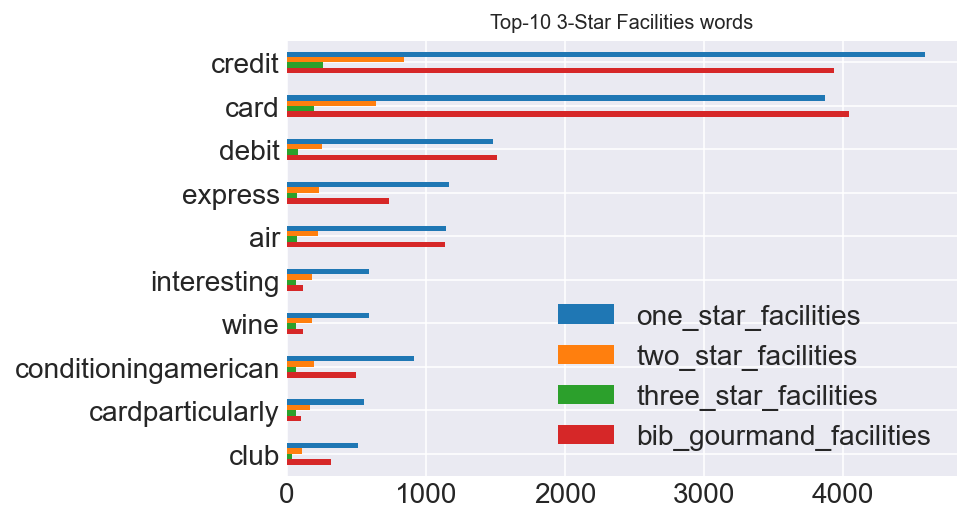

In [65]:
# Plot Top-20 Facilities Words and compare by Awards
features_list = ['one_star_facilities','two_star_facilities','three_star_facilities','bib_gourmand_facilities']

fontsize = 10
plt.rc('font', size=10)
plt.figure(figsize=(5, 40), dpi=80)

plt.rc('font', size=14)
word_counts.sort_values('three_star_facilities', ascending=False)[features_list].head(10).plot.barh()

plt.gca().invert_yaxis()
plt.title('Top-10 3-Star Facilities words', fontdict={'fontsize': fontsize})

plt.show()

<Figure size 400x3200 with 0 Axes>

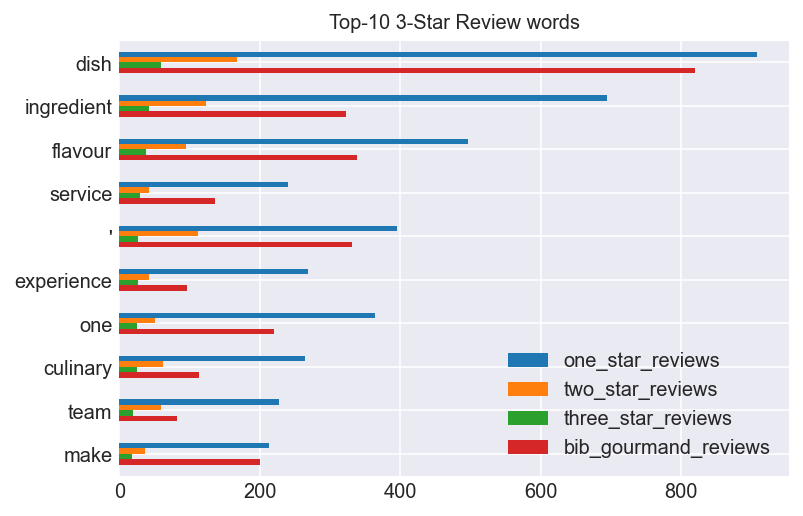

In [66]:
# Plot Top-20 Review Words and compare by Awards
features_list = ['one_star_reviews','two_star_reviews','three_star_reviews','bib_gourmand_reviews']

fontsize = 10
plt.rc('font', size=10)
plt.figure(figsize=(5, 40), dpi=80)

word_counts.sort_values('three_star_reviews', ascending=False)[features_list].head(10).plot.barh()

plt.gca().invert_yaxis()
plt.title('Top-10 3-Star Review words', fontdict={'fontsize': fontsize})

plt.show()

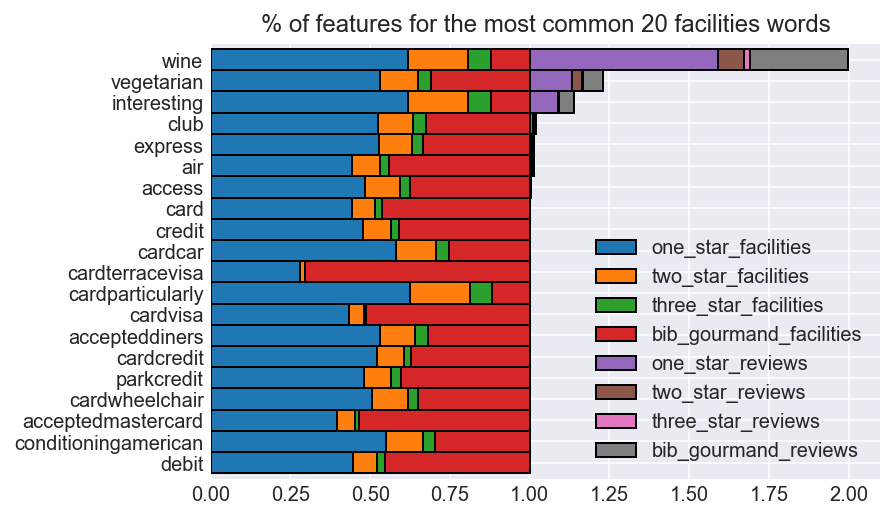

In [67]:
## visually compare features by the top 20 most frequent facility words
plt.rc('font', size=10)

(word_counts.sort_values('all_facilities', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all_facilities'], axis = 1)
 .drop(columns = ['all_facilities','all_reviews'])
 .sort_values(by = features_list)
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of features for the most common 20 facilities words')
plt.legend()#(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

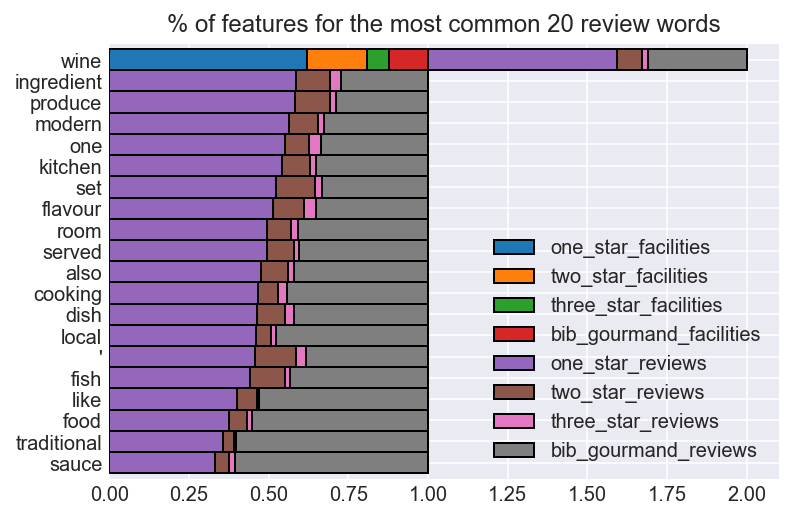

In [68]:
## visually compare features by the top 20 most frequent review words
plt.rc('font', size=10)

(word_counts.sort_values('all_reviews', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all_reviews'], axis = 1)
 .drop(columns = ['all_facilities','all_reviews'])
 .sort_values(by = features_list)
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of features for the most common 20 review words')
plt.legend()#(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [69]:
word_counts.columns

Index(['all_facilities', 'one_star_facilities', 'two_star_facilities',
       'three_star_facilities', 'bib_gourmand_facilities', 'all_reviews',
       'one_star_reviews', 'two_star_reviews', 'three_star_reviews',
       'bib_gourmand_reviews'],
      dtype='object')

In [70]:
wc_facilities_col_list = ['all_facilities', 'one_star_facilities', 'two_star_facilities',
                            'three_star_facilities', 'bib_gourmand_facilities']

wc_reviews_col_list = ['all_reviews', 'one_star_reviews', 'two_star_reviews', 
                            'three_star_reviews','bib_gourmand_reviews']

wc_facilities_df = word_counts[wc_facilities_col_list]

wc_reviews_df = word_counts[wc_reviews_col_list]

In [71]:
wc_reviews_df.T

credit  card  debit  air  express  conditioningamerican  \
all_reviews                2     5      0   33       27                     0   
one_star_reviews           1     2      0   14       13                     0   
two_star_reviews           0     2      0    2        4                     0   
three_star_reviews         0     0      0    1        3                     0   
bib_gourmand_reviews       1     1      0   16        7                     0   

                      acceptedmastercard  access  cardwheelchair  parkcredit  \
all_reviews                            0       6               0           0   
one_star_reviews                       0       2               0           0   
two_star_reviews                       0       1               0           0   
three_star_reviews                     0       0               0           0   
bib_gourmand_reviews                   0       3               0           0   

                      ...  sentits  suitfreewheeling  se  lightbulb  levant  \
all_reviews           ...        1                 1   1          1       1   
one_star_reviews      ...        0                 0   0          1       0   
two_star_reviews      ...        0                 0   0          0       0   
three_star_reviews    ...        0                 0   0          0       0   
bib_gourmand_reviews  ...        1                 1   1          0       1   

                      sumacflecked  falafelspiced  dukkah  cobia  200g  
all_reviews                      1              1       1      1     1  
one_star_reviews                 0              0       0      0     0  
two_star_reviews                 0              0       0      0     0  
three_star_reviews               0              0       0      0     0  
bib_gourmand_reviews             1              1       1      1     1  

[5 rows x 22556 columns]

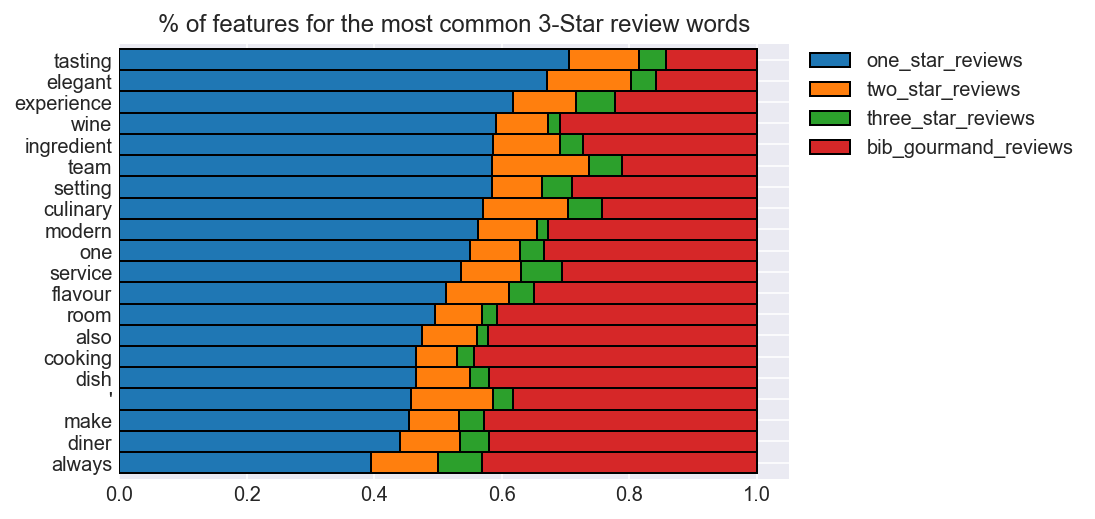

In [72]:
## visually compare features by the top 20 most frequent review words

plt.rc('font', size=10)

(wc_reviews_df.sort_values('three_star_reviews', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all_reviews'], axis = 1)
 .drop(columns = ['all_reviews'])
 .sort_values(by = features_list)
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of features for the most common 3-Star review words')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# N-Grams

### Bi-Grams

In [73]:
# Display Bi-Gram using ngram code
list(nltk.ngrams(all_reviews_words, 2))

[('straight', 'picture'),
 ('picture', 'book'),
 ('book', 'beautiful'),
 ('beautiful', 'inn'),
 ('inn', 'stand'),
 ('stand', 'edge'),
 ('edge', 'forest'),
 ('forest', 'diner'),
 ('diner', 'look'),
 ('look', 'forward'),
 ('forward', 'friendly'),
 ('friendly', 'family'),
 ('family', 'atmosphere'),
 ('atmosphere', 'great'),
 ('great', 'food'),
 ('food', 'also'),
 ('also', 'enjoyed'),
 ('enjoyed', 'delightful'),
 ('delightful', 'terrace'),
 ('terrace', 'dish'),
 ('dish', 'range'),
 ('range', 'regional'),
 ('regional', 'mediterranean'),
 ('mediterranean', 'whether'),
 ('whether', 'order'),
 ('order', 'steak'),
 ('steak', 'fish'),
 ('fish', 'local'),
 ('local', 'game'),
 ('game', 'something'),
 ('something', 'everyone'),
 ('everyone', 'modern'),
 ('modern', 'yet'),
 ('yet', 'cosy'),
 ('cosy', 'guestroom'),
 ('guestroom', 'overnight'),
 ('overnight', 'stay'),
 ('stay', 'steeped'),
 ('steeped', 'tradition'),
 ('tradition', 'run'),
 ('run', 'great'),
 ('great', 'commitment'),
 ('commitment', 'l

Text(0.5, 1.0, 'Top-20 Bigrams for All Review words')

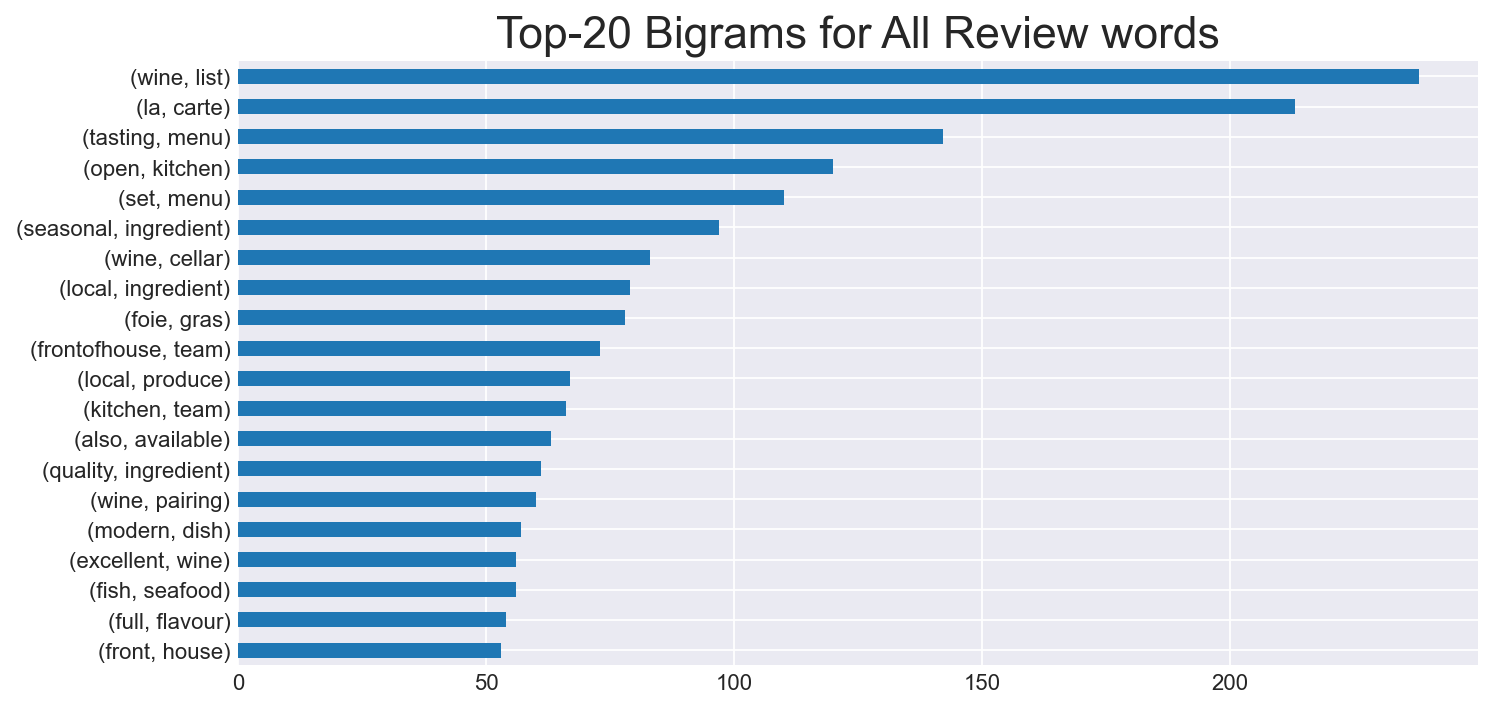

In [74]:
# Display top Bigrams for All Review words

fontsize = 20
plt.figure(figsize=(10, 5), dpi=80)

pd.Series(nltk.bigrams(all_reviews_words)
         ).value_counts().head(20).plot.barh()
plt.gca().invert_yaxis()

plt.title('Top-20 Bigrams for All Review words', fontdict={'fontsize': fontsize})

In [76]:
# Create Bi-Gram Variables
all_reviews_2_gram = list(nltk.ngrams(all_reviews_words, 2))
one_star_reviews_2_gram = list(nltk.ngrams(one_star_reviews_words, 2))
two_star_reviews_2_gram = list(nltk.ngrams(two_star_reviews_words, 2))
three_star_reviews_2_gram = list(nltk.ngrams(three_star_reviews_words, 2))
bib_gourmand_reviews_2_gram = list(nltk.ngrams(bib_gourmand_reviews_words, 2))

# Create Bi-Gram Variables
all_facilities_2_gram = list(nltk.ngrams(all_facilities_words, 2))
one_star_facilities_2_gram = list(nltk.ngrams(one_star_facilities_words, 2))
two_star_facilities_2_gram = list(nltk.ngrams(two_star_facilities_words, 2))
three_star_facilities_2_gram = list(nltk.ngrams(three_star_facilities_words, 2))
bib_gourmand_facilities_2_gram = list(nltk.ngrams(bib_gourmand_facilities_words, 2))

<function matplotlib.pyplot.show(close=None, block=None)>

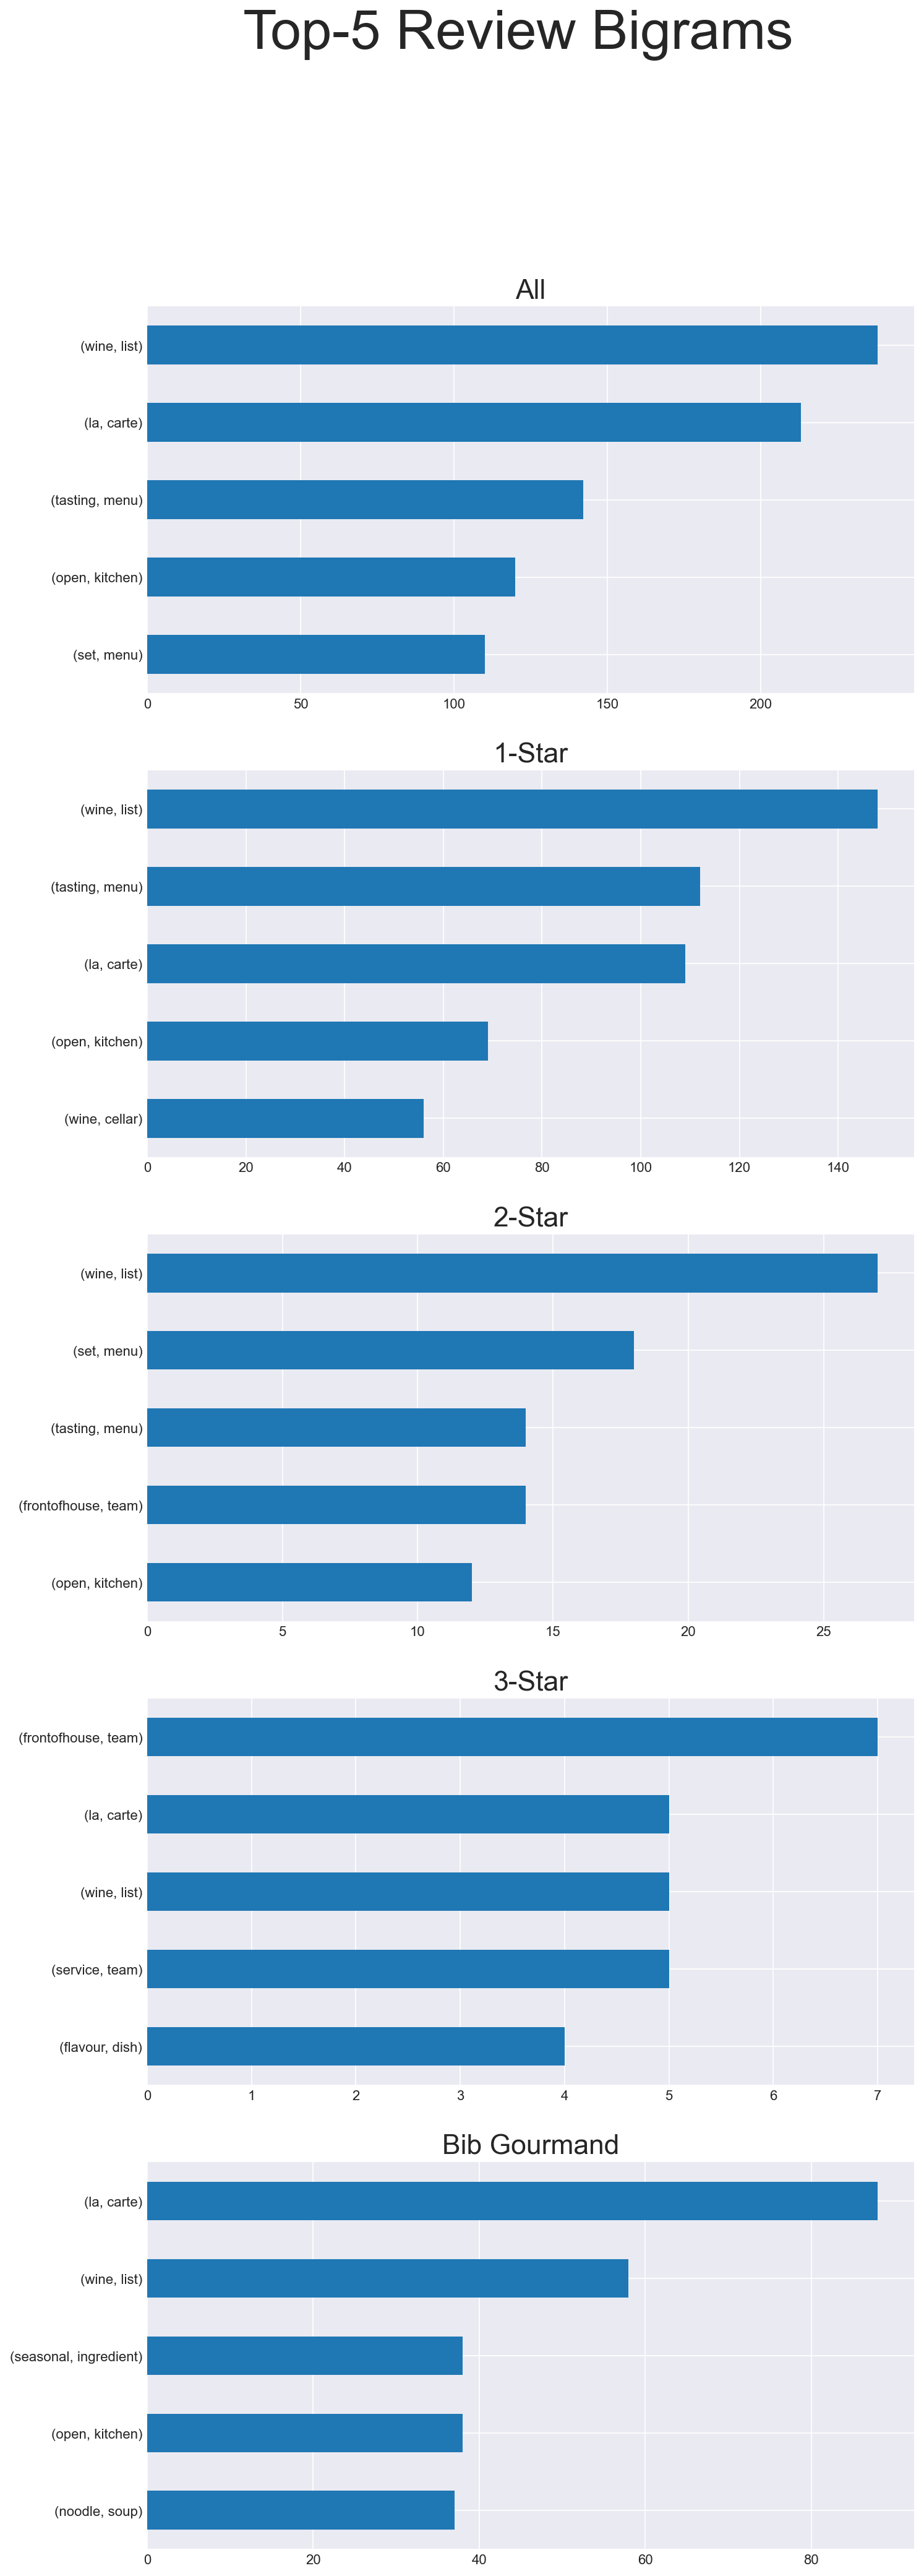

In [77]:
# Display top 5 Review bigram pairs for awards

fontsize = 20
plt.figure(figsize=(10, 30), dpi=80)

plt.suptitle("Top-5 Review Bigrams", fontsize=40)

plt.subplot(5,1,1)
pd.Series(all_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All', fontdict={'fontsize': fontsize})

plt.subplot(5,1,2)
pd.Series(one_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,3)
pd.Series(two_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,4)
pd.Series(three_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,5)
pd.Series(bib_gourmand_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand', fontdict={'fontsize': fontsize})

plt.show

In [78]:
two_star_facilities_2_gram

[('air', 'conditioningamerican'),
 ('conditioningamerican', 'express'),
 ('express', 'credit'),
 ('credit', 'cardcredit'),
 ('cardcredit', 'card'),
 ('card', 'debit'),
 ('debit', 'card'),
 ('card', 'acceptedmastercard'),
 ('acceptedmastercard', 'credit'),
 ('credit', 'cardnotable'),
 ('cardnotable', 'sake'),
 ('sake', 'listrestaurant'),
 ('listrestaurant', 'offering'),
 ('offering', 'vegetarian'),
 ('vegetarian', 'menusvalet'),
 ('menusvalet', 'parkingvisa'),
 ('parkingvisa', 'credit'),
 ('credit', 'cardwheelchair'),
 ('cardwheelchair', 'access'),
 ('access', 'air'),
 ('air', 'conditioningcar'),
 ('conditioningcar', 'parkcredit'),
 ('parkcredit', 'card'),
 ('card', 'debit'),
 ('debit', 'card'),
 ('card', 'acceptedmastercard'),
 ('acceptedmastercard', 'credit'),
 ('credit', 'cardterracevisa'),
 ('cardterracevisa', 'credit'),
 ('credit', 'cardwheelchair'),
 ('cardwheelchair', 'access'),
 ('access', 'air'),
 ('air', 'conditioningamerican'),
 ('conditioningamerican', 'express'),
 ('express

<function matplotlib.pyplot.show(close=None, block=None)>

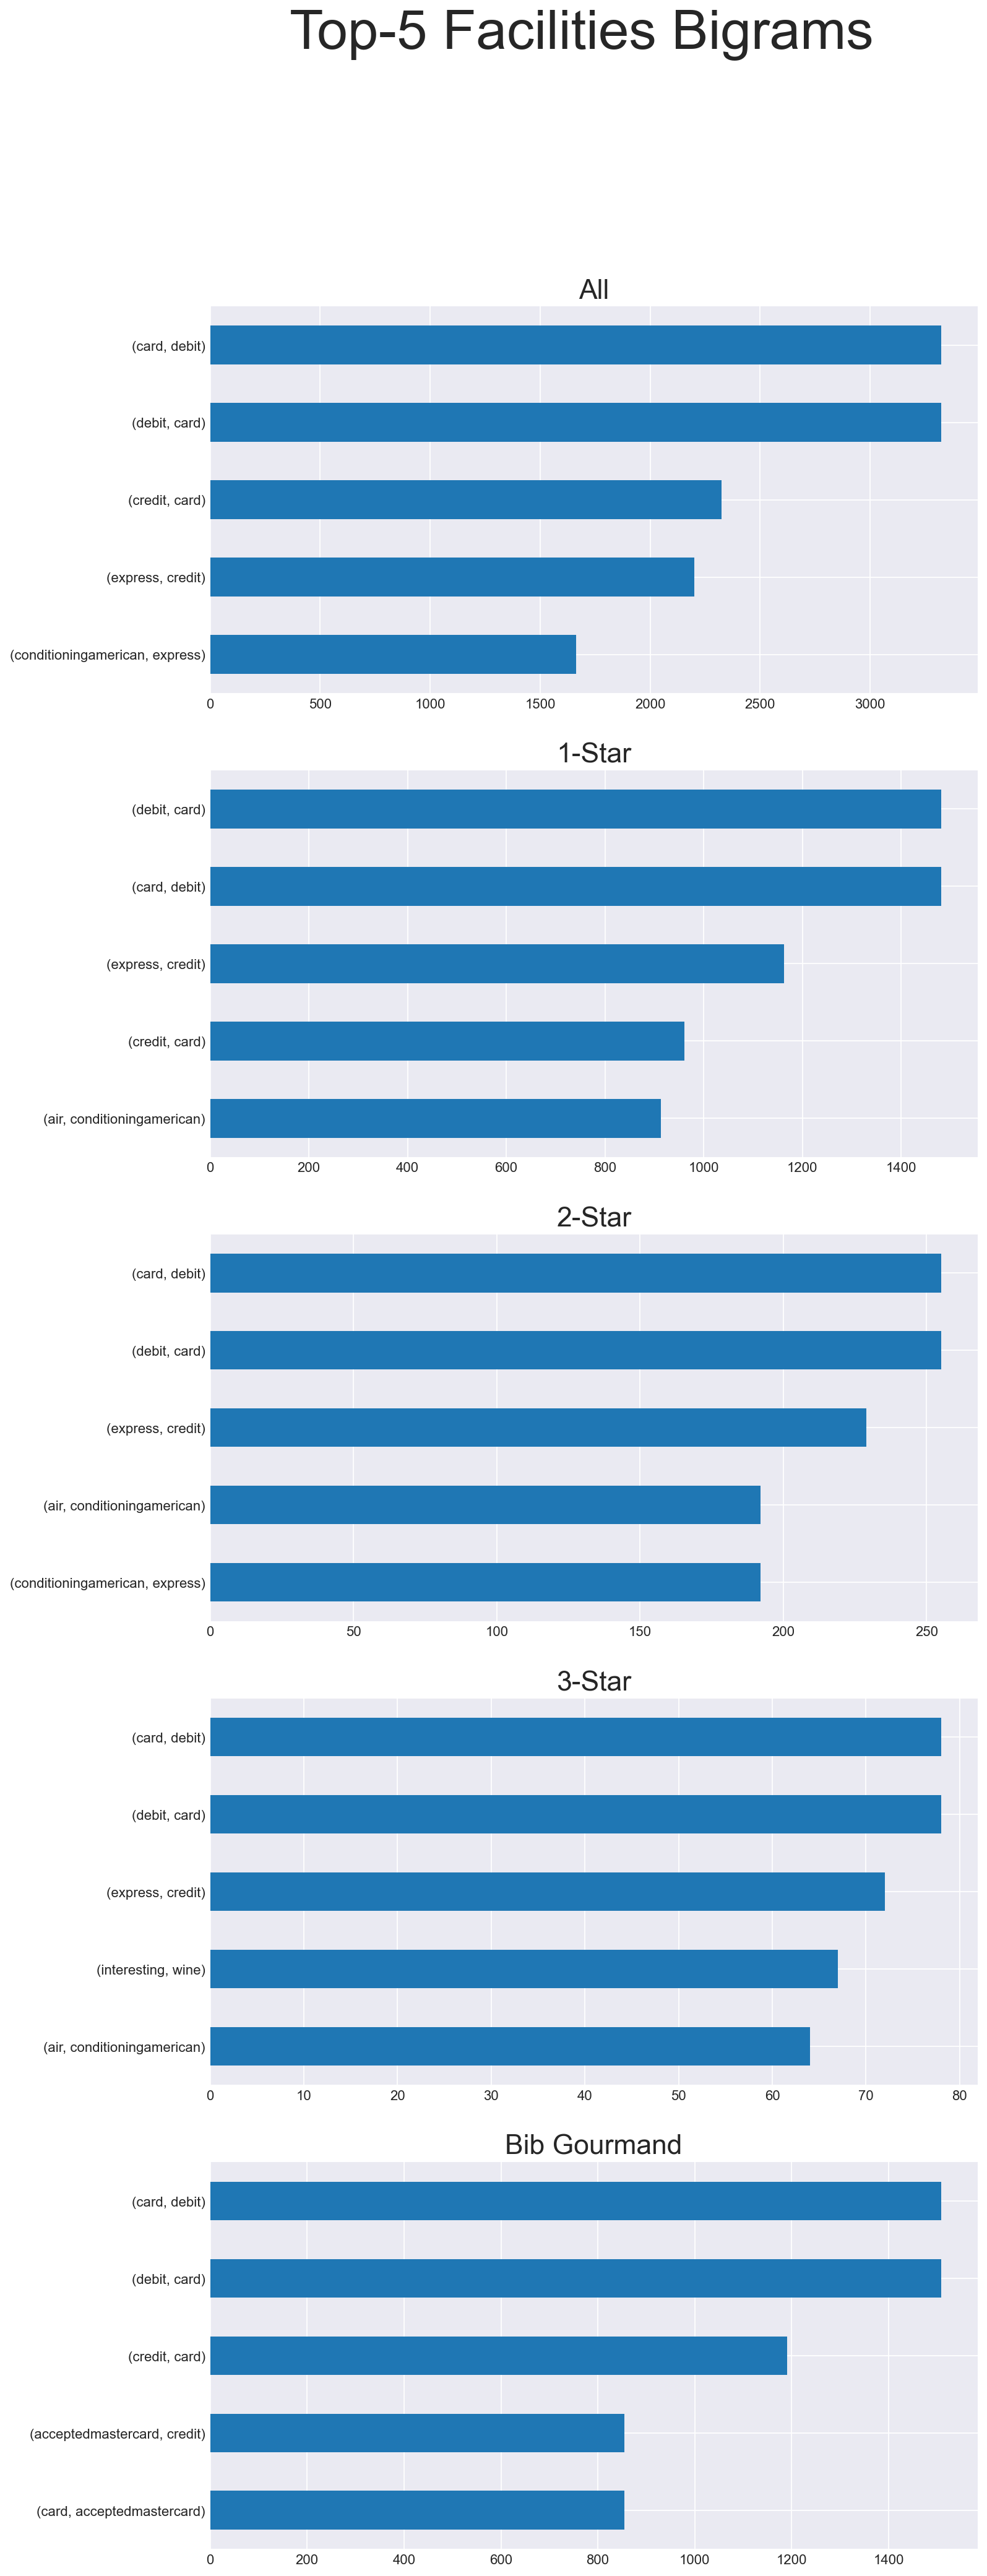

In [79]:
# Display top 5 Facilities bigram pairs for awards

fontsize = 20
plt.figure(figsize=(10, 30), dpi=80)

plt.suptitle("Top-5 Facilities Bigrams", fontsize=40)

plt.subplot(5,1,1)
pd.Series(all_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All', fontdict={'fontsize': fontsize})

plt.subplot(5,1,2)
pd.Series(one_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,3)
pd.Series(two_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,4)
pd.Series(three_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,5)
pd.Series(bib_gourmand_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand', fontdict={'fontsize': fontsize})

plt.show

### Tri-Grams

In [80]:
# Display Tri-Gram using ngram code
list(nltk.ngrams(all_reviews_words, 3))

[('straight', 'picture', 'book'),
 ('picture', 'book', 'beautiful'),
 ('book', 'beautiful', 'inn'),
 ('beautiful', 'inn', 'stand'),
 ('inn', 'stand', 'edge'),
 ('stand', 'edge', 'forest'),
 ('edge', 'forest', 'diner'),
 ('forest', 'diner', 'look'),
 ('diner', 'look', 'forward'),
 ('look', 'forward', 'friendly'),
 ('forward', 'friendly', 'family'),
 ('friendly', 'family', 'atmosphere'),
 ('family', 'atmosphere', 'great'),
 ('atmosphere', 'great', 'food'),
 ('great', 'food', 'also'),
 ('food', 'also', 'enjoyed'),
 ('also', 'enjoyed', 'delightful'),
 ('enjoyed', 'delightful', 'terrace'),
 ('delightful', 'terrace', 'dish'),
 ('terrace', 'dish', 'range'),
 ('dish', 'range', 'regional'),
 ('range', 'regional', 'mediterranean'),
 ('regional', 'mediterranean', 'whether'),
 ('mediterranean', 'whether', 'order'),
 ('whether', 'order', 'steak'),
 ('order', 'steak', 'fish'),
 ('steak', 'fish', 'local'),
 ('fish', 'local', 'game'),
 ('local', 'game', 'something'),
 ('game', 'something', 'everyone')

Text(0.5, 1.0, 'Top-20 Trigrams for All Review words')

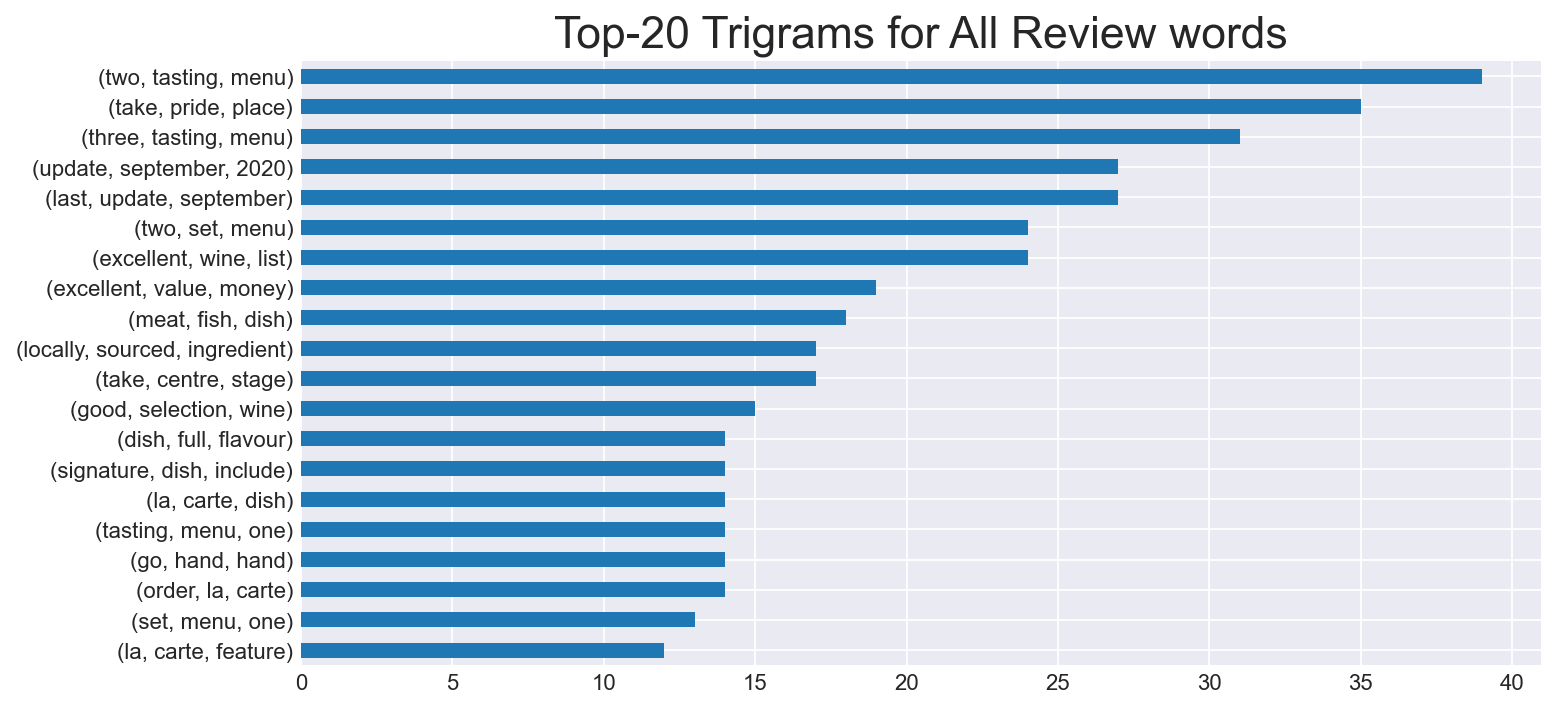

In [81]:
# Display top Trigrams for All Review words

fontsize = 20
plt.figure(figsize=(10, 5), dpi=80)

pd.Series(nltk.ngrams(all_reviews_words, 3)
         ).value_counts().head(20).plot.barh()
plt.gca().invert_yaxis()
plt.title('Top-20 Trigrams for All Review words', fontdict={'fontsize': fontsize})

In [176]:
update_df = train[train.data.str.contains('update')]

In [82]:
# Create Tri-Gram Variables
all_reviews_3_gram = list(nltk.ngrams(all_reviews_words, 3))
one_star_reviews_3_gram = list(nltk.ngrams(one_star_reviews_words, 3))
two_star_reviews_3_gram = list(nltk.ngrams(two_star_reviews_words, 3))
three_star_reviews_3_gram = list(nltk.ngrams(three_star_reviews_words, 3))
bib_gourmand_reviews_3_gram = list(nltk.ngrams(bib_gourmand_reviews_words, 3))

# Create Tri-Gram Variables
all_facilities_3_gram = list(nltk.ngrams(all_facilities_words, 3))
one_star_facilities_3_gram = list(nltk.ngrams(one_star_facilities_words, 3))
two_star_facilities_3_gram = list(nltk.ngrams(two_star_facilities_words, 3))
three_star_facilities_3_gram = list(nltk.ngrams(three_star_facilities_words, 3))
bib_gourmand_facilities_3_gram = list(nltk.ngrams(bib_gourmand_facilities_words, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

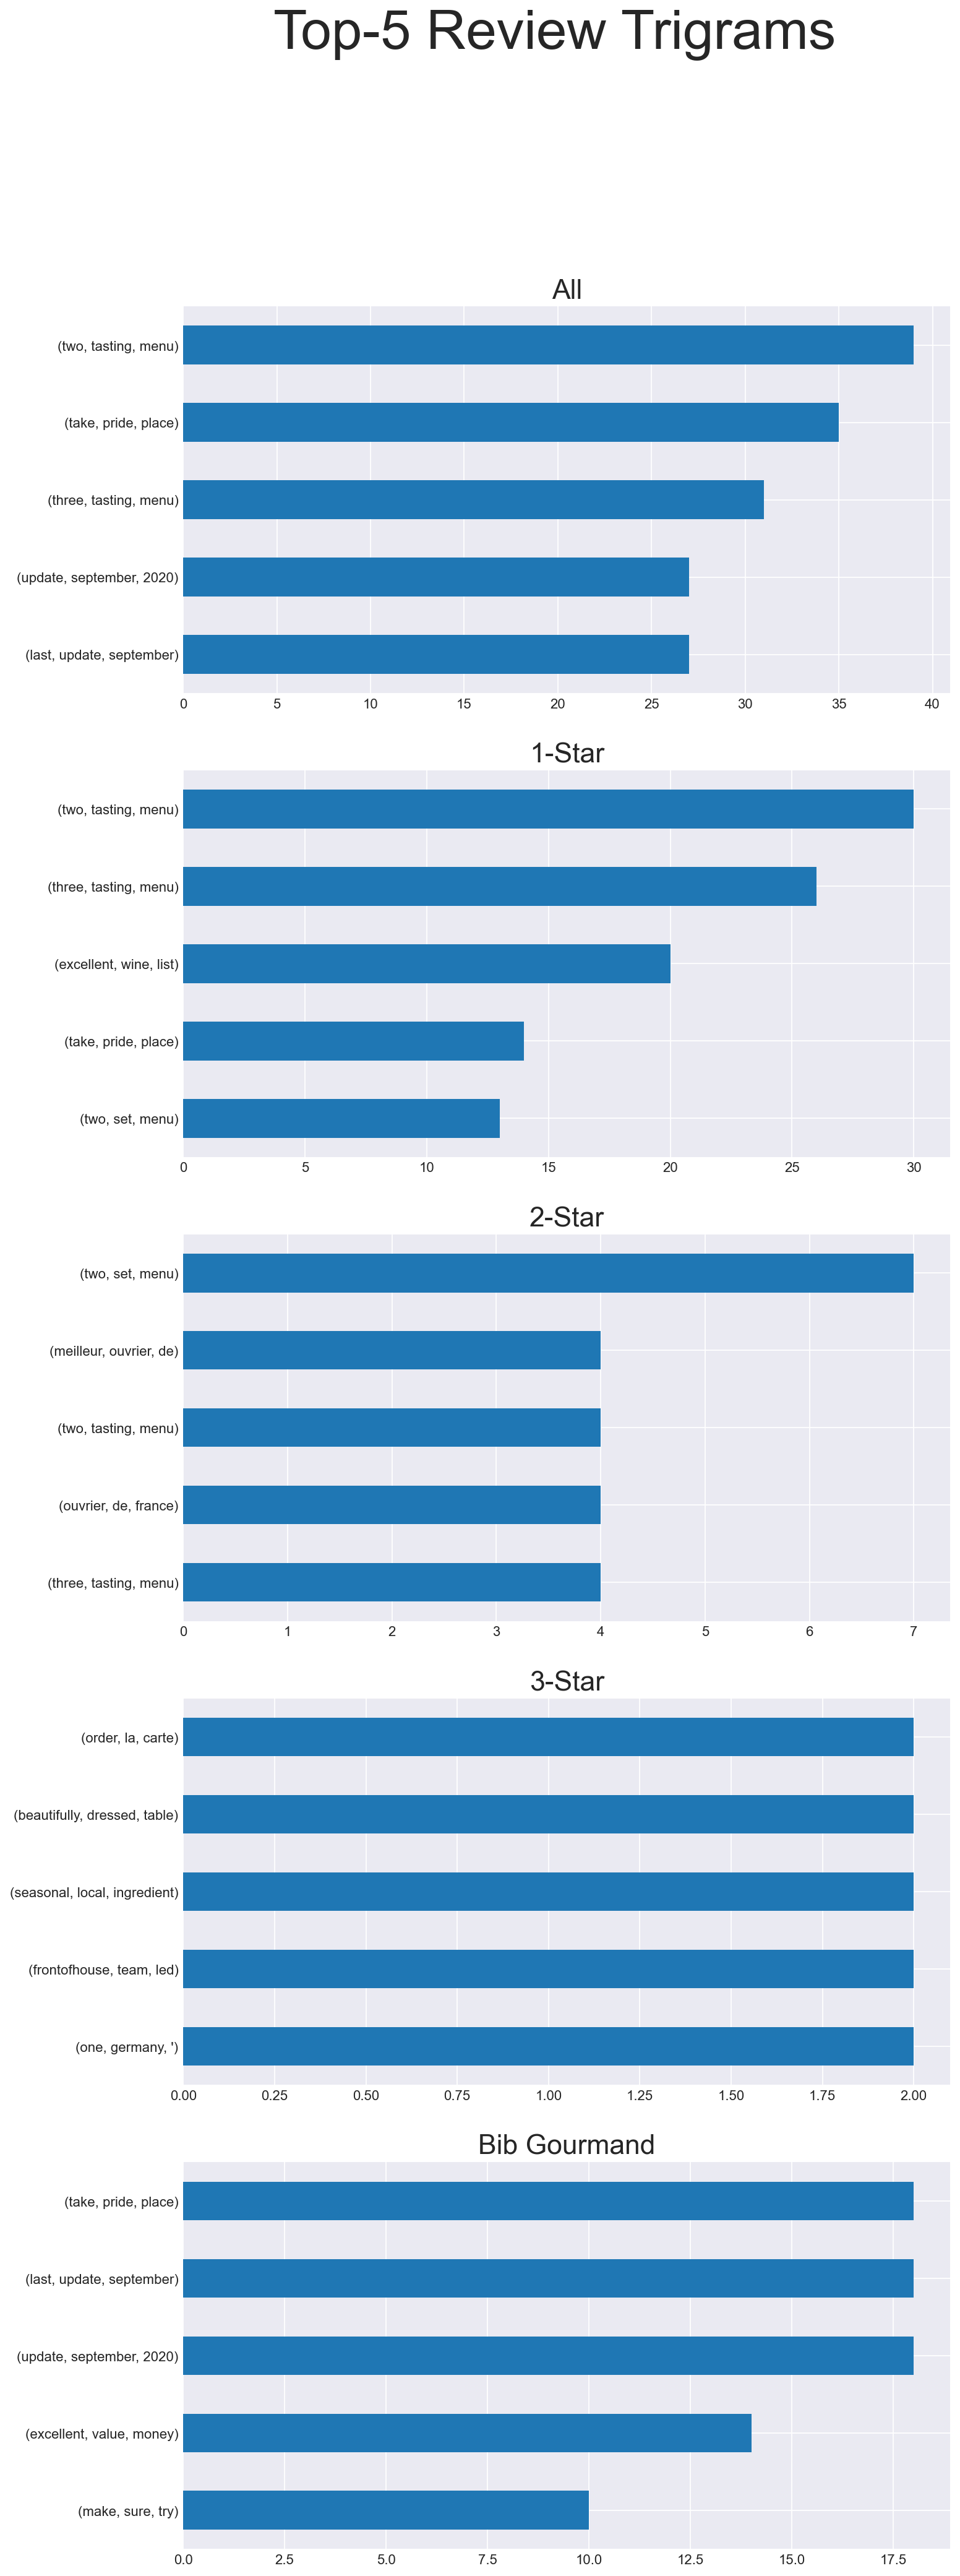

In [177]:
# Display top 5 Review Trigram groups for awards

fontsize = 20
plt.figure(figsize=(10, 30), dpi=80)
plt.suptitle("Top-5 Review Trigrams", fontsize=40)


plt.subplot(5,1,1)
pd.Series(all_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All', fontdict={'fontsize': fontsize})

plt.subplot(5,1,2)
pd.Series(one_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,3)
pd.Series(two_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,4)
pd.Series(three_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,5)
pd.Series(bib_gourmand_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand', fontdict={'fontsize': fontsize})

plt.show

In [150]:
train.award.value_counts()

bib gourmand        1908
1 michelin star     1536
2 michelin stars     270
3 michelin stars      79
Name: award, dtype: Int64

In [180]:
two_taste_df = train[train.data.str.contains('two tasting menu')]
three_taste_df = train[train.data.str.contains('three tasting menu')]

In [181]:
two_taste_df.award.value_counts()

1 michelin star     30
bib gourmand         5
2 michelin stars     4
Name: award, dtype: Int64

<AxesSubplot:>

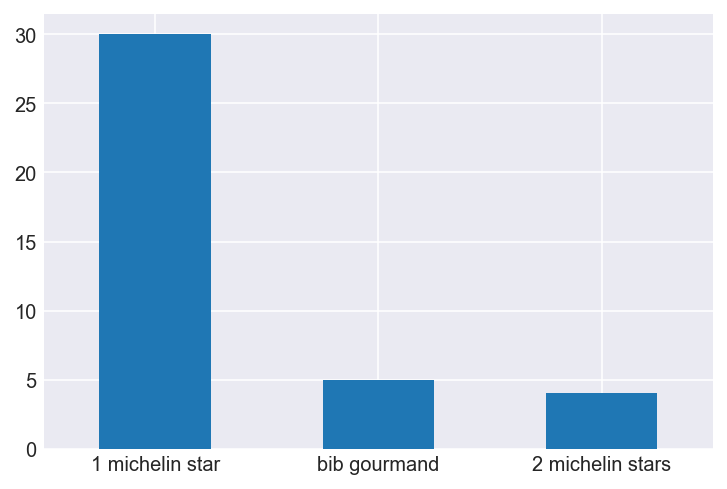

In [190]:
two_taste_df['award'].value_counts(sort=True).plot.bar(rot=0)

In [182]:
three_taste_df.award.value_counts()

1 michelin star     26
2 michelin stars     4
3 michelin stars     1
Name: award, dtype: Int64

<AxesSubplot:>

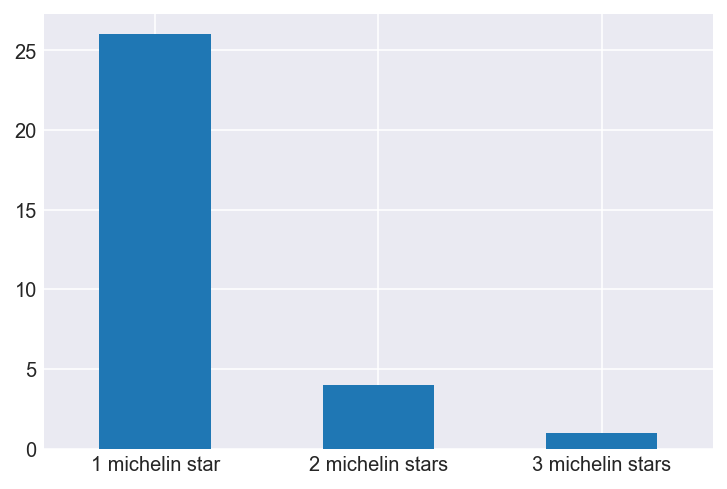

In [191]:
three_taste_df['award'].value_counts(sort=True).plot.bar(rot=0)

In [84]:
two_star_facilities_3_gram

[('air', 'conditioningamerican', 'express'),
 ('conditioningamerican', 'express', 'credit'),
 ('express', 'credit', 'cardcredit'),
 ('credit', 'cardcredit', 'card'),
 ('cardcredit', 'card', 'debit'),
 ('card', 'debit', 'card'),
 ('debit', 'card', 'acceptedmastercard'),
 ('card', 'acceptedmastercard', 'credit'),
 ('acceptedmastercard', 'credit', 'cardnotable'),
 ('credit', 'cardnotable', 'sake'),
 ('cardnotable', 'sake', 'listrestaurant'),
 ('sake', 'listrestaurant', 'offering'),
 ('listrestaurant', 'offering', 'vegetarian'),
 ('offering', 'vegetarian', 'menusvalet'),
 ('vegetarian', 'menusvalet', 'parkingvisa'),
 ('menusvalet', 'parkingvisa', 'credit'),
 ('parkingvisa', 'credit', 'cardwheelchair'),
 ('credit', 'cardwheelchair', 'access'),
 ('cardwheelchair', 'access', 'air'),
 ('access', 'air', 'conditioningcar'),
 ('air', 'conditioningcar', 'parkcredit'),
 ('conditioningcar', 'parkcredit', 'card'),
 ('parkcredit', 'card', 'debit'),
 ('card', 'debit', 'card'),
 ('debit', 'card', 'accep

<function matplotlib.pyplot.show(close=None, block=None)>

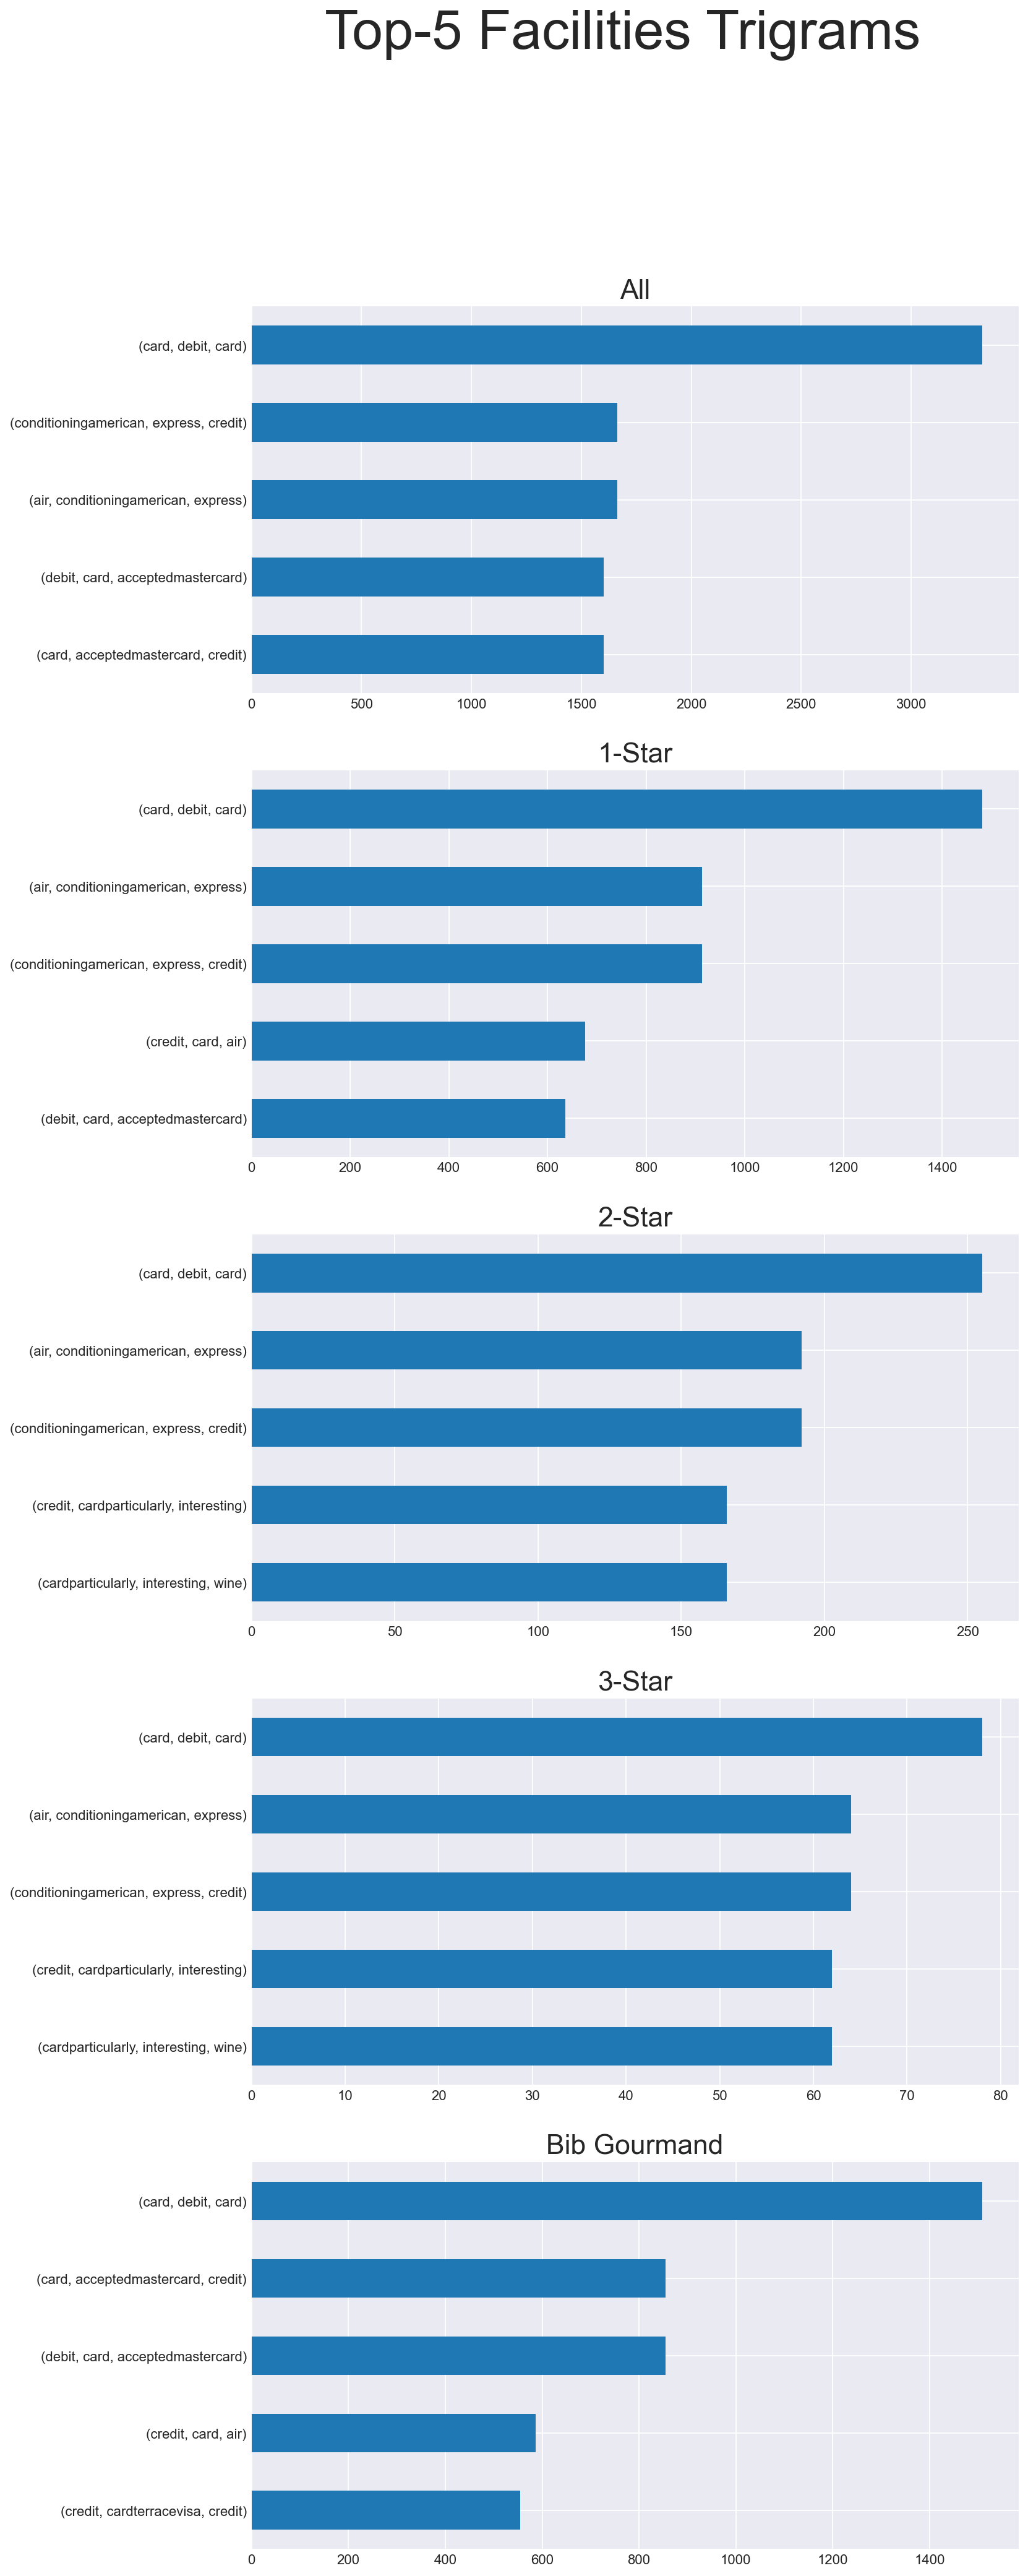

In [147]:
# Display top 5 Facilities Trigram groups for awards

fontsize = 20
plt.figure(figsize=(10, 30), dpi=80)
plt.suptitle("Top-5 Facilities Trigrams", fontsize=40)


plt.subplot(5,1,1)
pd.Series(all_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All', fontdict={'fontsize': fontsize})

plt.subplot(5,1,2)
pd.Series(one_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,3)
pd.Series(two_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,4)
pd.Series(three_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star', fontdict={'fontsize': fontsize})

plt.subplot(5,1,5)
pd.Series(bib_gourmand_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand', fontdict={'fontsize': fontsize})

plt.show

In [86]:
train.T

6345  \
name                                                     gasthaus ödenturm   
address                               am ödenturm 11, cham, 93413, germany   
location                                                     cham, germany   
price                                                                    €   
cuisine                             country cooking, mediterranean cuisine   
longitude                                                        12.703851   
latitude                                                         49.210919   
url                      https://guide.michelin.com/en/bayern/cham/rest...   
award                                                         bib gourmand   
facilities_and_services  car park,credit card / debit card accepted,gre...   
data                     as if straight out of a picture book, this bea...   
price_level                                                              1   
city                                                                  cham   
country                                                            germany   
clean                    straight picture book beautiful inn stands edg...   
lemmatized               straight picture book beautiful inn stand edge...   
word_count                                                              38   

                                                                      6427  \
name                                                        weinhaus anker   
address                  obertorstraße 13, marktheidenfeld, 97828, germany   
location                                          marktheidenfeld, germany   
price                                                                    €   
cuisine                                            french, country cooking   
longitude                                                         9.600301   
latitude                                                         49.845621   
url                      https://guide.michelin.com/en/bayern/marktheid...   
award                                                         bib gourmand   
facilities_and_services  american express credit card,car park,credit c...   
data                     a restaurant that is steeped in tradition and ...   
price_level                                                              1   
city                                                       marktheidenfeld   
country                                                            germany   
clean                    steeped tradition run great commitment lovely ...   
lemmatized               steeped tradition run great commitment lovely ...   
word_count                                                              35   

                                                                      5217  \
name                                                 yang bao bao (nanzih)   
address                  106 chaoming road, nanzih district, kaohsiung,...   
location                                      kaohsiung, taipei & taichung   
price                                                                    $   
cuisine                                                          dumplings   
longitude                                                        120.32805   
latitude                                                          22.72416   
url                      https://guide.michelin.com/en/kaohsiung-region...   
award                                                         bib gourmand   
facilities_and_services                air conditioning,car park,cash only   
data                     in 1993, this dumpling shop began life as a st...   
price_level                                                              1   
city                                                             kaohsiung   
country                                                  taipei & taichung   
clean                    1993 dumpling shop began life street stall loc...   
lemmatized  

In [87]:
train.columns

Index(['name', 'address', 'location', 'price', 'cuisine', 'longitude',
       'latitude', 'url', 'award', 'facilities_and_services', 'data',
       'price_level', 'city', 'country', 'clean', 'lemmatized', 'word_count'],
      dtype='object')

In [88]:
train.award.unique()

<StringArray>
['bib gourmand', '3 michelin stars', '1 michelin star', '2 michelin stars']
Length: 4, dtype: string

<AxesSubplot:title={'center':'Award Distribution'}, ylabel='award'>

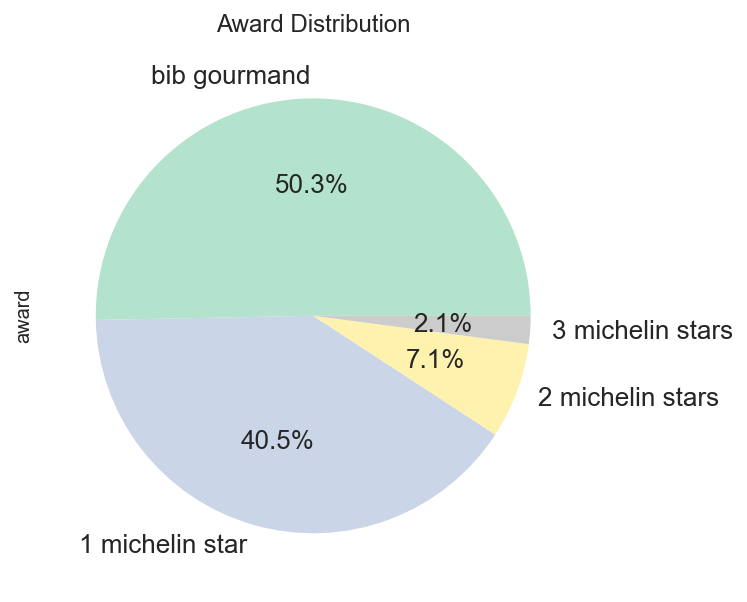

In [189]:
kwargs = dict(
    #startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    #explode    = (0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Award Distribution'
)

train['award'].value_counts().plot.pie(**kwargs)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='price_level', ylabel='word_count'>

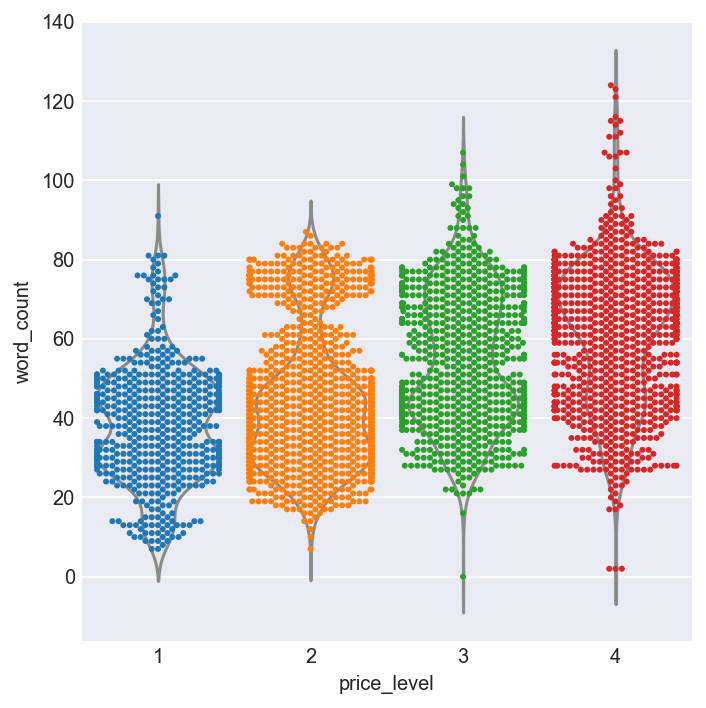

In [ ]:
sns.catplot(data=train, x="price_level", y="word_count", kind="violin", color=".9", inner=None)
sns.swarmplot(data=train, x="price_level", y="word_count", size=3)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



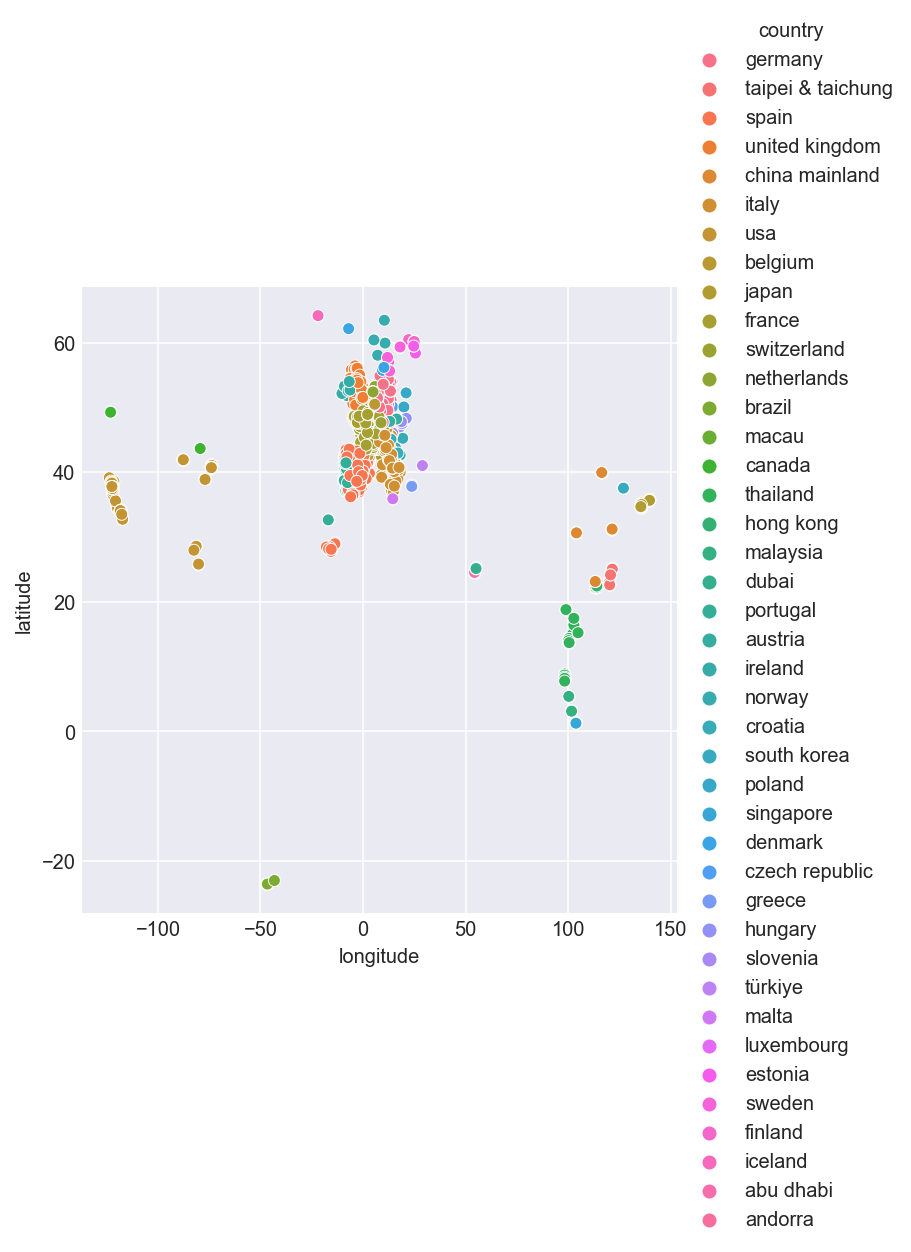

In [145]:
# plot longitude & latitude with hue by award
sns.relplot(data = train, x = 'longitude', 
            y = 'latitude', hue = 'country')

In [90]:
import plotly.express as px

fig = px.scatter(train[train.award == '3 michelin stars'], x='longitude', y='latitude',
                 size='word_count', color='country',
                 hover_name='country', log_x=True, size_max=40,
                 title="Word Count of 3-Star Michelin Awards by Country")
fig.update_layout(
    title={
        'text': "Word Count of 3-Star Michelin Awards by Country",
        'y':0.85,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

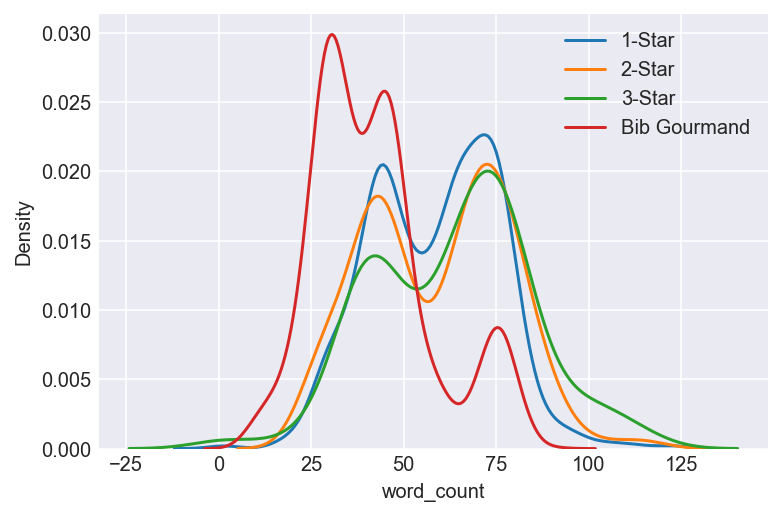

In [91]:
# is the distribution for word_count different for any of the awards
sns.kdeplot(train[train.award == '1 michelin star'].word_count, label = '1-Star')
sns.kdeplot(train[train.award == '2 michelin stars'].word_count, label = '2-Star')
sns.kdeplot(train[train.award == '3 michelin stars'].word_count, label = '3-Star')
sns.kdeplot(train[train.award == 'bib gourmand'].word_count, label = 'Bib Gourmand')
plt.legend(['1-Star', '2-Star', '3-Star', 'Bib Gourmand'])

<AxesSubplot:>

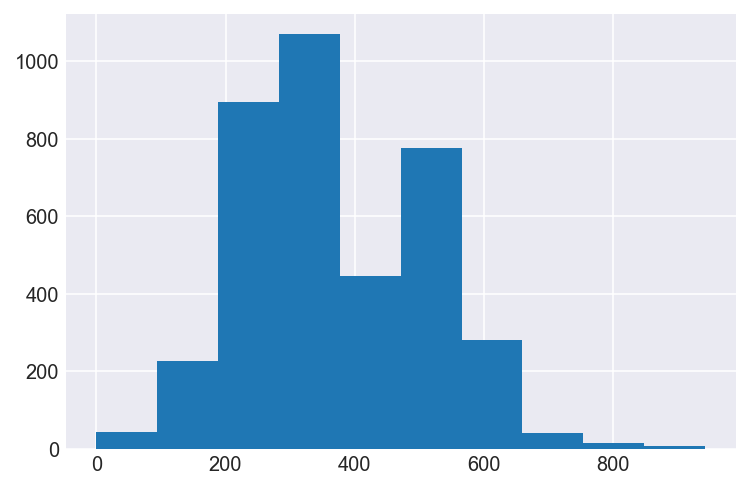

In [92]:
# number of characters present in each sentence of the reviews.
train['lemmatized'].str.len().hist()

### **OBSERVATION:**
* Reviews range between 0 and 800 characters and are frequently between 200-600 characters.

In [93]:
# number of words appearing in each review.
#text.str.split().map(lambda x: len(x)).hist()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



<AxesSubplot:>

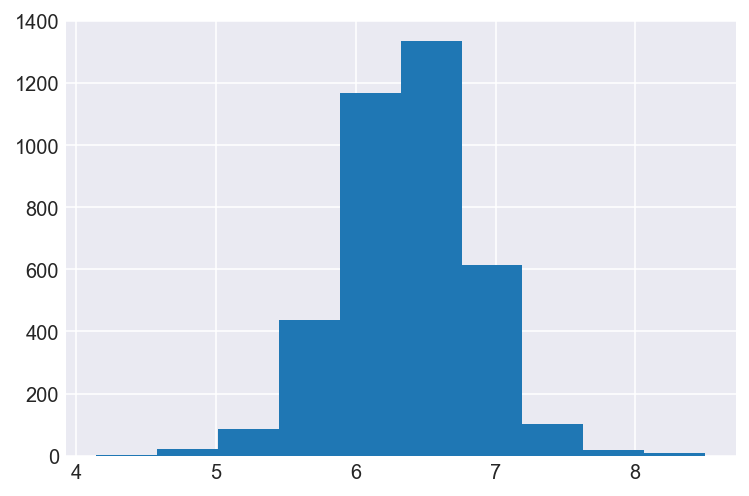

In [94]:
# check the average word length in each sentence.

train['lemmatized'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

### **OBSERVATION:**
* Word length averages between 5 and 8 with 6 being the most common length

# STOP WORDS

In [95]:
# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

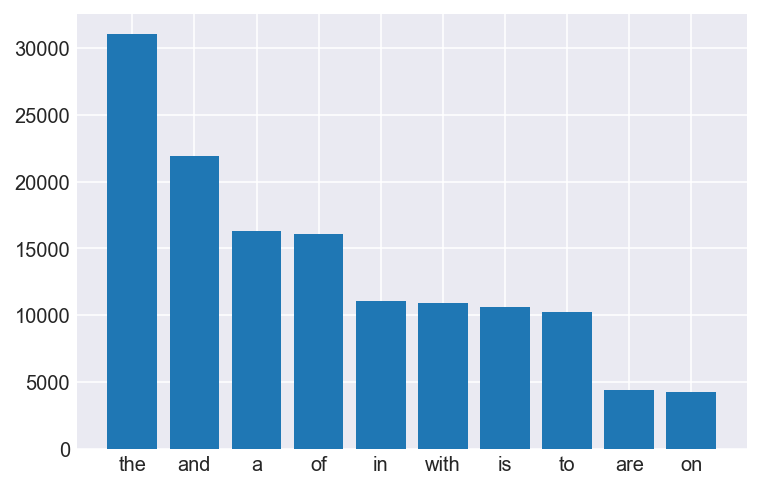

In [149]:
plot_top_stopwords_barchart(df.data)

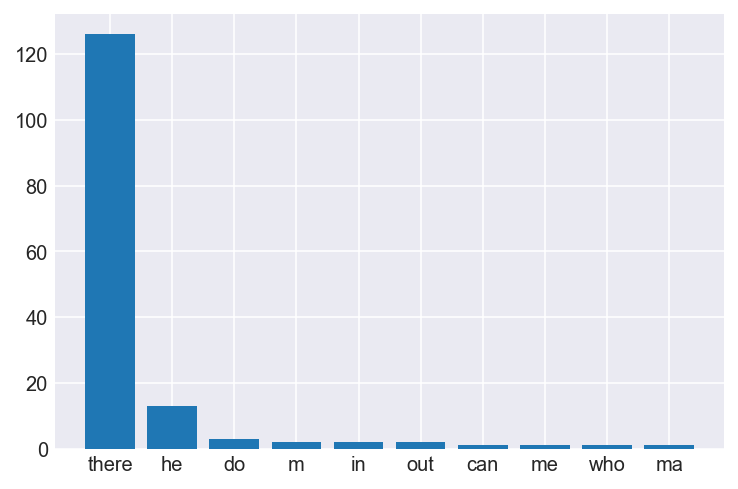

In [97]:
plot_top_stopwords_barchart(train.lemmatized)

# pyLDAvis

In [113]:
# Code Snippet for Creating LDA visualization

#!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

import nltk
import gensim
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

In [114]:
lda_model, bow_corpus, dic = get_lda_objects(train.lemmatized)

[nltk_data] Downloading package stopwords to /Users/qmcbt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
plot_lda_vis(lda_model, bow_corpus, dic)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.092186  0.016300       1        1  32.586406
0      0.019019  0.022554       2        1  23.932554
1      0.036163 -0.062359       3        1  16.475172
2     -0.035328 -0.015128       4        1  13.699263
4      0.072332  0.038632       5        1  13.306605, topic_info=         Term        Freq       Total Category  logprob  loglift
89     noodle  229.000000  229.000000  Default  30.0000  30.0000
1450     rice  328.000000  328.000000  Default  29.0000  29.0000
324      soup  258.000000  258.000000  Default  28.0000  28.0000
544     sauce  449.000000  449.000000  Default  27.0000  27.0000
93       pork  332.000000  332.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
158      come   49.571590  358.865392   Topic5  -6.2178   0.0374
444      take   49.243282  414.775344   Topic5  -6.2244  -0.1141
21      local   46.021122  599.916516   Topic5  -6.2921  -0.5508
229   produce   45.517259  517.802625   Topic5  -6.3031  -0.4146
206       set   43.530201  532.721124   Topic5  -6.3477  -0.4876

[474 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
1793       2  0.921598      1940s
3849       3  0.787849       1975
3786       4  0.734795       2007
1123       2  0.430071       2020
1123       3  0.092158       2020
...      ...       ...        ...
12650      3  0.785631   yamamoto
12650      5  0.130938   yamamoto
8066       4  0.914912     yamato
5463       2  0.767386  yorkshire
9157       1  0.825792        zum

[1100 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3, 5])

In [118]:
train.columns

Index(['name', 'address', 'location', 'price', 'cuisine', 'longitude',
       'latitude', 'url', 'award', 'facilities_and_services', 'data',
       'price_level', 'city', 'country', 'clean', 'lemmatized', 'word_count'],
      dtype='object')

In [127]:
fig = px.histogram(train, x='country', template='plotly_white', title='Award Count by Country')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Number of Awards')
fig.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [130]:
fig = px.histogram(train, x='award', template='plotly_white', title='Award Count by Type')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Number of Awards')
fig.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [131]:
fig = px.histogram(train, x='price_level', template='plotly_white', title='Award Count by Price Level')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Number of Awards')
fig.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [242]:
# 1
Hex_Codes_Earthy = ['#854d27', '#dd7230', '#f4c95d', '#e7e393', '#04030f']
# 2
Hex_Codes_Reliable = ['#362417', '#92817a', '#f1dabf', '#fffbff', '#04030f']
# 3
Hex_Codes_Urgency = ['#ff0022', '#edfdfb', '#b9bab8', '#f8e9f2', '#04030f']
# 7
Hex_Codes_Casual = ['#06aed5', '#086788', '#f2f4f3', '#f0c808', '#dd1c1a']




(array([0, 1, 2, 3]),
 [Text(0, 0, '3 michelin stars'),
  Text(1, 0, '2 michelin stars'),
  Text(2, 0, '1 michelin star'),
  Text(3, 0, 'bib gourmand')])

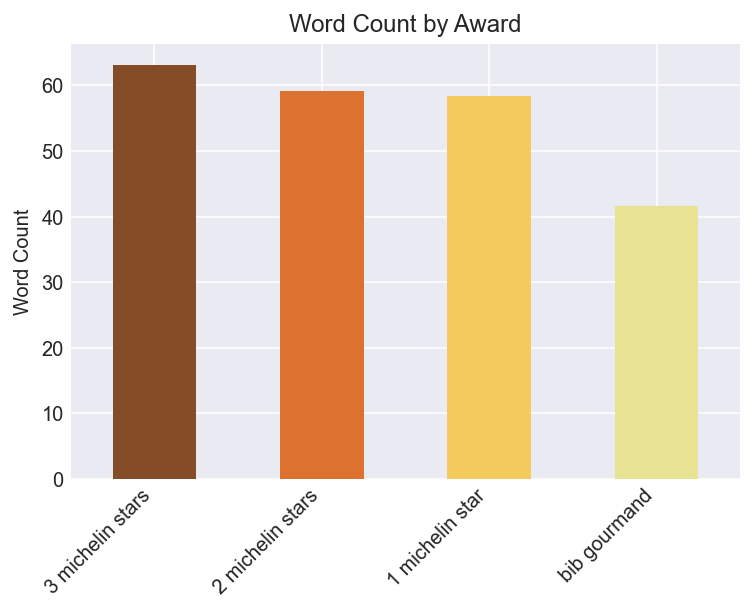

In [249]:
dfg = train.groupby(['award'])['word_count'].mean().sort_values(ascending= False)
Hex_Codes_Earthy = ['#854d27', '#dd7230', '#f4c95d', '#e7e393', '#04030f']

#create a bar plot
dfg.plot(kind='bar', title='Word Count by Award', ylabel='Word Count',
         xlabel='',fontsize =10,color=Hex_Codes_Earthy)
plt.xticks(rotation=45, ha='right')


# WordClouds

In [101]:
from wordcloud import WordCloud

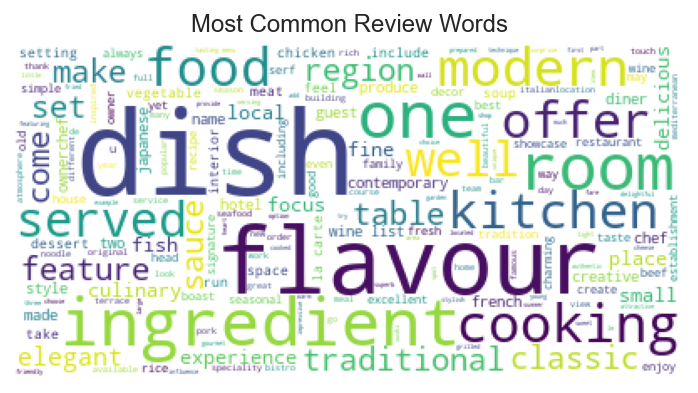

In [102]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(all_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Review Words')
plt.show()

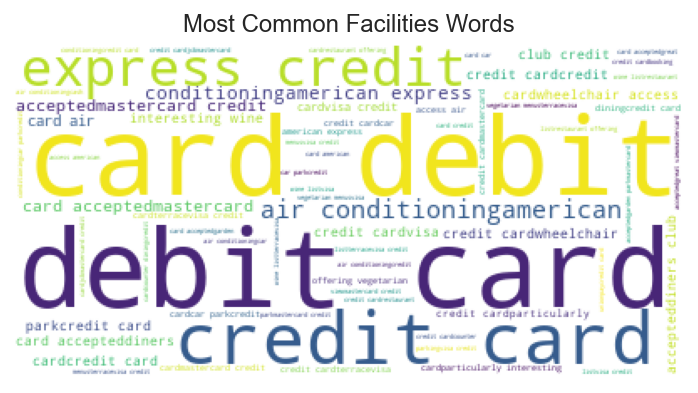

In [103]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(all_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Facilities Words')
plt.show()

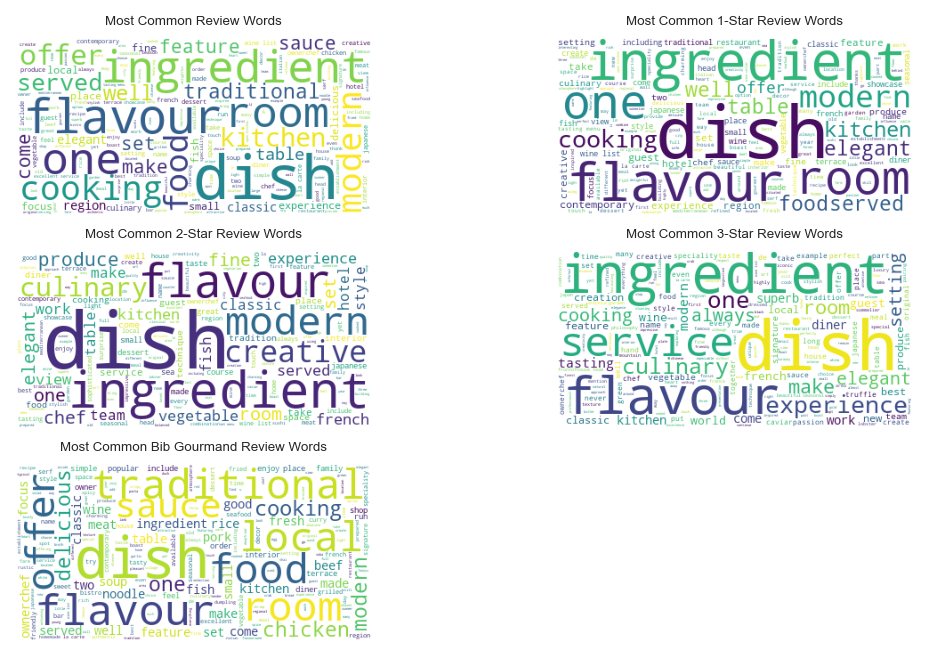

In [104]:
# making multiple word clouds:

fontsize = 6
plt.figure(figsize=(8, 5), dpi=80)

plt.subplot(3,2,1)
img = WordCloud(background_color='white'
               ).generate(' '.join(all_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Review Words', fontdict={'fontsize': fontsize})

plt.subplot(3,2,2)
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Review Words', fontdict={'fontsize': fontsize})

plt.subplot(3,2,3)
img = WordCloud(background_color='white'
               ).generate(' '.join(two_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 2-Star Review Words', fontdict={'fontsize': fontsize})

plt.subplot(3,2,4)
img = WordCloud(background_color='white'
               ).generate(' '.join(three_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 3-Star Review Words', fontdict={'fontsize': fontsize})

plt.subplot(3,2,5)
img = WordCloud(background_color='white'
               ).generate(' '.join(bib_gourmand_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Bib Gourmand Review Words', fontdict={'fontsize': fontsize})

plt.show()

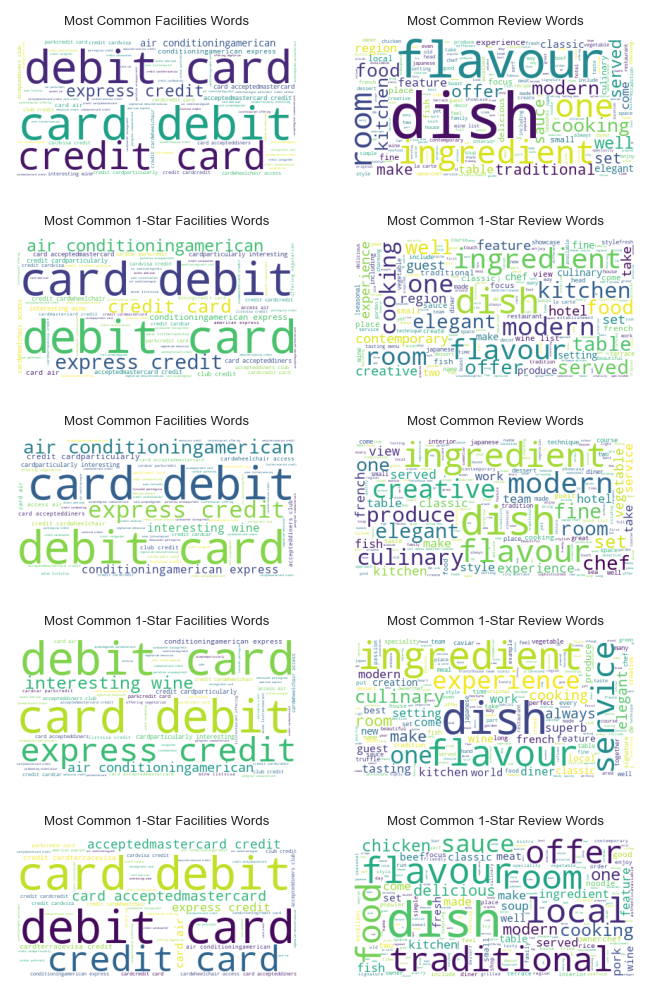

In [105]:
# making multiple word clouds:

fontsize = 6
plt.figure(figsize=(5, 8), dpi=80)

plt.subplot(5,2,1)
img = WordCloud(background_color='white'
               ).generate(' '.join(all_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Facilities Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,2)
img = WordCloud(background_color='white'
               ).generate(' '.join(all_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Review Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,3)
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Facilities Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,4)
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Review Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,5)
img = WordCloud(background_color='white'
               ).generate(' '.join(two_star_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Facilities Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,6)
img = WordCloud(background_color='white'
               ).generate(' '.join(two_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Review Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,7)
img = WordCloud(background_color='white'
               ).generate(' '.join(three_star_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Facilities Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,8)
img = WordCloud(background_color='white'
               ).generate(' '.join(three_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Review Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,9)
img = WordCloud(background_color='white'
               ).generate(' '.join(bib_gourmand_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Facilities Words', fontdict={'fontsize': fontsize})

plt.subplot(5,2,10)
img = WordCloud(background_color='white'
               ).generate(' '.join(bib_gourmand_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Review Words', fontdict={'fontsize': fontsize})


plt.show()

**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?
    * two_tail (feature_1, feature_2)  
<br>

* One Sample or Two Samples?    
    * two_sample (feature_1, feature_2)  
<Br>

* Continuous or Discreat?  
    * Discreat (feature_1) vs Discreat (feature_2) = **$Chi^2$**
    * T-Test = ```Discreat``` vs ```Continuous```  
    * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
    * $Chi^2$ = ```Discreat``` vs ```Discreat```  
<br>

* 𝐻_0: The opposite of what I am trying to prove  
    * H_{0}: feature_1 **is NOT** ```dependent``` on feature_2  
    * ```feature_1``` != ```feature_2```  
<br>

* 𝐻_𝑎: What am I trying to prove  
    * H_{a}: feature_1 **is** ```dependent``` on feature_2  
    * ```feature_1``` == ```feature_2```

# Explore:
<div class="alert alert-info">

* **TARGET:** Award

### Q1. Is there a relationship between Reviews and Facilities?
* **Statistical Test:** ```Pearson's R```
* **Results:** ```r: TBD, p-val: TBD```
* **Answer:** There <b><u>is NOT a ```significant relationship```</b></u> between Reviews and Facilities.

### Q2. Are there significant differences between the Review word count of Awards?
* **Statistical Test:** ```ANOVA```
* **Results:** ```f-val: TBD, p-val: TBD```
* **Answer:** There <b><u>is a ```significant difference```</b></u> between the Review word count of Awards.

### Q3. Is there a relationship between Review word_count and Award value_count?
### Q3a. Is there a relationship between Review word_count and Award word_count?
### Q3b. Is there a relationship between Facilities word_count and Award value_count?
### Q3c. Is there a relationship between Facilities word_count and Award word_count?
* **Statistical Test:** ```T-Test```
* **Results:** ```t-stat: TBD, p-val: TBD```
* **Answer:** There <b><u>is a ```significant relationship```</b></u> between the Year and Life Expectancy.

    
### Q4. Is there a relationship between review Bi-Grams and award?
### Q4a. Is there a relationship between review Tri-Grams and award?
* **Statistical Test:** ```ANOVA```
* **Results:** 
```
            Fail to reject the null hypothesis
            -----------------------------------
            f_val: 0.03439011284255776
            p_val: 0.9663835314416852
```
* **Answer:** award **is NOT** ```dependent``` on Tri_gram_1 or Tri_gram_2.

### Q5. Is there a relationship between Tri-Gram [two, tasting, menu] and award?
### Q5a. Is there a relationship between Tri-Gram [three, tasting, menu] and award?
* **Statistical Test:** ```ANOVA```
* **Results:** 
```
            Fail to reject the null hypothesis
            -----------------------------------
            f_val: 0.03439011284255776
            p_val: 0.9663835314416852
```
* **Answer:** award **is NOT** ```dependent``` on Tri_gram_1 or Tri_gram_2.
</div>

# Statistical Testing

<div class="alert alert-warning">

### Q1. Is there a relationship between Reviews and Facilities?

In [372]:
facilities_wc_by_award = f_train.groupby('award').word_count.mean()
reviews_wc_by_award = train.groupby('award').word_count.mean()

In [373]:
facilities_wc_by_award

award
1 michelin star     15.836589
2 michelin stars    17.740741
3 michelin stars    19.202532
bib gourmand        10.602725
Name: word_count, dtype: float64

In [374]:
reviews_wc_by_award

award
1 michelin star     58.432943
2 michelin stars    59.222222
3 michelin stars    63.177215
bib gourmand        41.574948
Name: word_count, dtype: float64

### Hypothesis

two_tail, two_sample  

* Continuous or Discreat?  
    * Continuous (reviews_wc_by_award) vs Discreat (facilities_wc_by_award) = **Pearson’s-R**
        * T-Test = ```Discreat``` vs ```Continuous```  
        * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
        * $Chi^2$ = ```Discreat``` vs ```Discreat``` 
        * ANOVA = ```Continuous``` vs 1_or_More nominal or ordinal (Discreat) (analysis of variance) 
<br>
<br>
* 𝐻_0: The opposite of what I am trying to prove  
    * H_{0}: reviews **does NOT have** a ```significant relationship``` with facilities  
    * ```reviews_wc_by_award``` != ```facilities_wc_by_award``` 
<br>
<br>
* 𝐻_𝑎: What am I trying to prove  
    * H_{a}: reviews **has** a ```significant relationship``` with facilities  
    * ```reviews_wc_by_award``` == ```facilities_wc_by_award``` 

### Visualization

(array([0, 1, 2, 3]),
 [Text(0, 0, '3 michelin stars'),
  Text(1, 0, '2 michelin stars'),
  Text(2, 0, '1 michelin star'),
  Text(3, 0, 'bib gourmand')])

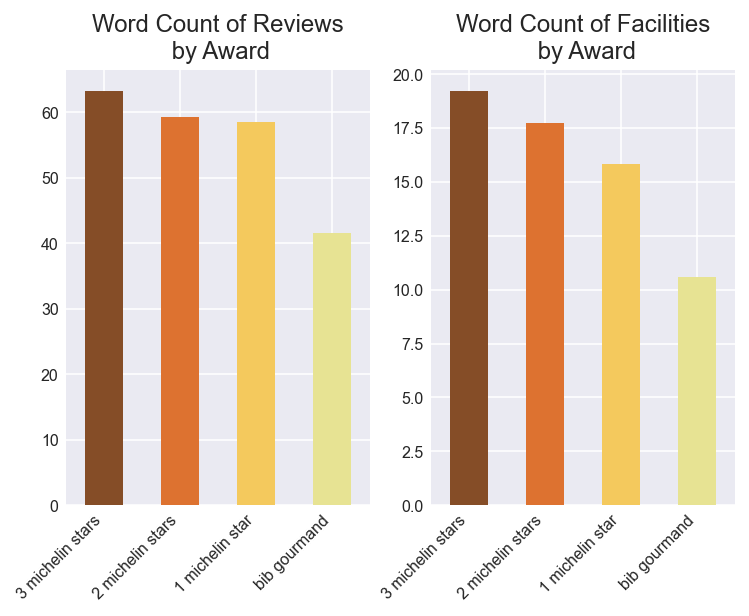

In [444]:
# REVIEWS
viz_reviews_wc_by_award = reviews_wc_by_award.sort_values(ascending=False)
Hex_Codes_Earthy = ['#854d27', '#dd7230', '#f4c95d', '#e7e393', '#04030f']

#create a bar plot
plt.subplot(1,2,1)
viz_reviews_wc_by_award.plot(kind='bar', title='Word Count of Reviews\n by Award', ylabel='',
         xlabel='',fontsize =8, color=Hex_Codes_Earthy)
plt.xticks(rotation=45, ha='right')

# FACILITIES
viz_facilities_wc_by_award = facilities_wc_by_award.sort_values(ascending=False)
Hex_Codes_Earthy = ['#854d27', '#dd7230', '#f4c95d', '#e7e393', '#04030f']

#create a bar plot
plt.subplot(1,2,2)
viz_facilities_wc_by_award.plot(kind='bar', title='Word Count of Facilities\n by Award', ylabel='',
         xlabel='',fontsize =8, color=Hex_Codes_Earthy)
plt.xticks(rotation=45, ha='right')

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [379]:
# Levene

from scipy import stats

t_stat, p_val = stats.levene(reviews_wc_by_award, facilities_wc_by_award)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    
else:
    print('equal_var = True (we will assume equal variance)')
    
print('_______________________________________________________________')  
print(f't-stat: {t_stat}')
print(f'p-value: {p_val}')

equal_var = True (we will assume equal variance)
_______________________________________________________________
t-stat: 0.5050297190870925
p-value: 0.5039720943528714


### Test Hypothosis

In [381]:
# Pearson's-R

alpha = 0.05
r, p_val = stats.pearsonr(reviews_wc_by_award, facilities_wc_by_award)
    
if p_val < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
r= r.round(4)
p_val = p_val.round(4)
print('_____________________')  
print(f'correlation {r}')
print(f'p-value {p_val}')

Reject the null hypothesis
_____________________
correlation 0.98
p-value 0.02


<div class="alert alert-info">

### Takeaways:

### Q1. Is there a relationship between Reviews and Facilities?

### YES reviews **has** a ```significant relationship``` with facilities as verified by Pearson's-R test

<div class="alert alert-warning">

### Q2. Are there significant differences between the Review word counts of each Award?

In [396]:
mean_one_star = freq_one_star_reviews.mean()
mean_two_star = freq_two_star_reviews.mean()
mean_three_star = freq_three_star_reviews.mean()
mean_bib_star = freq_bib_gourmand_reviews.mean()

In [ ]:
reviews_wc_by_award

award
1 michelin star     58.432943
2 michelin stars    59.222222
3 michelin stars    63.177215
bib gourmand        41.574948
Name: word_count, dtype: float64

### Hypothesis

two_tail, two_sample  

* Continuous or Discreat?  
    * Continuous (reviews_wc_by_award) vs Discreat (facilities_wc_by_award) = **Pearson’s-R**
        * T-Test = ```Discreat``` vs ```Continuous```  
        * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
        * $Chi^2$ = ```Discreat``` vs ```Discreat``` 
        * ANOVA = ```Continuous``` vs 1_or_More nominal or ordinal (Discreat) (analysis of variance) 
<br>
<br>
* 𝐻_0: The opposite of what I am trying to prove  
    * H_{0}: reviews **does NOT have** a ```significant relationship``` with facilities  
    * ```reviews_wc_by_award``` != ```facilities_wc_by_award``` 
<br>
<br>
* 𝐻_𝑎: What am I trying to prove  
    * H_{a}: reviews **has** a ```significant relationship``` with facilities  
    * ```reviews_wc_by_award``` == ```facilities_wc_by_award``` 

### Visualization

In [397]:
# VIZ


**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [429]:
# Levene

from scipy import stats

t_stat, p_val = stats.levene(freq_one_star_reviews, freq_two_star_reviews,
                             freq_three_star_reviews, freq_bib_gourmand_reviews)
#(mean_one_star, mean_two_star, mean_three_star, mean_bib_star)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    
else:
    print('equal_var = True (we will assume equal variance)')
    
print('_______________________________________________________________')  
print(f't-stat: {t_stat}')
print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
_______________________________________________________________
t-stat: 106.27617616167203
p-value: 7.719134217630912e-25


### Test Hypothosis

In [431]:
def stat_ttest(var_1, var_2, equal_var=False, random_state=1992):    

    # Set Alpha α
    α = Alpha = alpha = 0.05

    """
    # # stats Levene test - returns p value. small p-value means unequal variances
    t_stat, p_val =stats.levene(freq_one_star_reviews, freq_two_star_reviews,
                                freq_three_star_reviews, freq_bib_gourmand_reviews)

    # high p-value suggests that the populations have equal variances
    if p_val < alpha:
        variance = False
        
    else:
        variance = True
    """

    # perform t-test
    t_stat, p_val = stats.ttest_ind(var_1, var_2,
                                    #freq_one_star_reviews, 
                                    #freq_two_star_reviews,
                                    #freq_three_star_reviews, 
                                    #freq_bib_gourmand_reviews,
                                    equal_var=False, random_state=1992)

    # print hypotheis status
    if p_val/2 < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')

    print('_____________________')  

    # round  and print results, divide p by 2  
    t_stat = t_stat.round(4)
    p_val = (p_val.round(4))/2
    print(f't-stat {t_stat}')
    print(f'p-value {p_val}')

In [437]:
# 1 2
stat_ttest(freq_one_star_reviews, freq_two_star_reviews)

Reject the null hypothesis
_____________________
t-stat 15.3879
p-value 0.0


In [438]:
# 1 3
stat_ttest(freq_one_star_reviews, freq_three_star_reviews)

Reject the null hypothesis
_____________________
t-stat 21.8413
p-value 0.0


In [439]:
# 1 4
stat_ttest(freq_one_star_reviews, freq_bib_gourmand_reviews)

Fail to reject the null hypothesis
_____________________
t-stat 0.0943
p-value 0.46245


In [440]:
# 2 3
stat_ttest(freq_two_star_reviews, freq_three_star_reviews)

Reject the null hypothesis
_____________________
t-stat 10.3773
p-value 0.0


In [441]:
# 2 4
stat_ttest(freq_two_star_reviews, freq_bib_gourmand_reviews)

Reject the null hypothesis
_____________________
t-stat -15.5549
p-value 0.0


In [442]:
# 3 4
stat_ttest(freq_three_star_reviews, freq_bib_gourmand_reviews)

Reject the null hypothesis
_____________________
t-stat -22.1752
p-value 0.0


In [443]:
# Kuskal
# Set Alpha α
α = Alpha = alpha = 0.05

# Perform Kuskal Stat Test
t,p_val = stats.kruskal(freq_one_star_reviews,
                        freq_two_star_reviews,
                        freq_three_star_reviews,
                        freq_bib_gourmand_reviews)
    
# Evaluate & Print Response
if p_val < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
print('_____________________')  
print(f't-stat {t.round(4)}')
print(f'p-value {p_val.round(4)}')

Reject the null hypothesis
_____________________
t-stat 306.638
p-value 0.0


<div class="alert alert-info">

### Takeaways:

### Q2. Are there significant differences between the Review word counts of each Award?

### YES There **are** ```significant differences``` between the Review Word Counts of each Award.

<div class="alert alert-warning">

### Q4. Is there a relationship between review Bi-Grams and award?
### Q4a. Is there a relationship between review Tri-Grams and award?

### Hypothesis

two_tail, two_sample  

* Continuous or Discreat?  
    * Continuous (award.value_count) vs Discreat (all_reviews_2_gram.value_count) vs Discreat (all_reviews_3_gram.value_count) = **ANOVA**
        * T-Test = ```Discreat``` vs ```Continuous```  
        * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
        * $Chi^2$ = ```Discreat``` vs ```Discreat``` 
        * ANOVA = ```Continuous``` vs 1_or_More nominal or ordinal (Discreat) (analysis of variance) 
<br>
<br>
* 𝐻_0: The opposite of what I am trying to prove  
    * H_{0}: award **does NOT have** a ```significant relationship``` with Tri_grams or Bi_grams  
    * ```award``` != ```tri_gram_1``` != ```tri_gram_2``` 
<br>
<br>
* 𝐻_𝑎: What am I trying to prove  
    * H_{a}: award **has** a ```significant relationship``` with Bi_grams and Tri_grams  
    * ```award``` == ```tri_gram_1``` == ```tri_gram_2``` 

### Visualization

In [366]:
# subsetting the data:
award = train.lemmatized.value_counts()
bi_grams = all_reviews_2_gram.value_counts()
tri_grams = all_reviews_3_gram.value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [352]:
# Levene

from scipy import stats

t_stat, p_val = stats.levene(award, tri_gram_1, tri_gram_2)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    
else:
    print('equal_var = True (we will assume equal variance)')
    
print('_______________________________________________________________')  
print(f't-stat: {t_stat}')
print(f'p-value: {p_val}')

equal_var = True (we will assume equal variance)
_______________________________________________________________
t-stat: 0.0006138735420503332
p-value: 0.9993863775994478


### Test Hypothosis

In [354]:
# Anova Test
import scipy.stats as stats

"""The dependent variable must be a continuous (interval or ratio) level of measurement. 
The independent variables in ANOVA must be categorical (nominal or ordinal) variables. 
Like the t-test, ANOVA is also a parametric test and has some assumptions. 
ANOVA assumes that the data is normally distributed."""

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
f_val, p_val = stats.f_oneway(award, tri_gram_1, tri_gram_2)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

print('-----------------------------------')
print(f'f_val: {f_val}')
print(f'p_val: {p_val}')

Fail to reject the null hypothesis
-----------------------------------
f_val: 0.03439011284255776
p_val: 0.9663835314416852


<div class="alert alert-danger">

### Takeaways:

### Q4. Is there a relationship between review Bi-Grams and award?
### Q4a. Is there a relationship between review Tri-Grams and award?

### I'm having a problem trying to figure out how to test this

<div class="alert alert-warning">

### Q5. Is there a relationship between Tri-Gram [two, tasting, menu] and award?
### Q5a. Is there a relationship between Tri-Gram [three, tasting, menu] and award?

### Hypothesis

two_tail, two_sample  

* Continuous or Discreat?  
    * Continuous (award.value_count) vs Discreat (all_reviews_3_gram) = **ANOVA**
        * T-Test = ```Discreat``` vs ```Continuous```  
        * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
        * $Chi^2$ = ```Discreat``` vs ```Discreat``` 
        * ANOVA = ```Continuous``` vs 1_or_More nominal or ordinal (Discreat) (analysis of variance) 
<br>
<br>
* $𝐻_0$: The opposite of what I am trying to prove  
    * $H_{0}$: award **is NOT** ```dependent``` on Tri_gram_1 or Tri_gram_2  
    * ```award``` != ```tri_gram_1``` != ```tri_gram_2``` 
<br>
<br>
* $𝐻_𝑎$: What am I trying to prove  
    * $H_{a}$: award **is** ```dependent``` on Tri_gram_1 or Tri_gram_2  
    * ```award``` == ```tri_gram_1``` == ```tri_gram_2``` 

### Visualization

In [445]:
# subsetting the data:
award = train[train.lemmatized.str.contains('two tasting menu')].award.value_counts()
tri_gram_1 = train[train.lemmatized.str.contains('two tasting menu')].award.value_counts()
tri_gram_2 = train[train.lemmatized.str.contains('three tasting menu')].award.value_counts()

In [446]:
award

1 michelin star     30
bib gourmand         5
2 michelin stars     4
Name: award, dtype: Int64

In [447]:
tri_gram_1

1 michelin star     30
bib gourmand         5
2 michelin stars     4
Name: award, dtype: Int64

In [448]:
tri_gram_2

1 michelin star     26
2 michelin stars     4
3 michelin stars     1
Name: award, dtype: Int64

(array([0, 1, 2]),
 [Text(0, 0, '1 michelin star'),
  Text(1, 0, '2 michelin stars'),
  Text(2, 0, '3 michelin stars')])

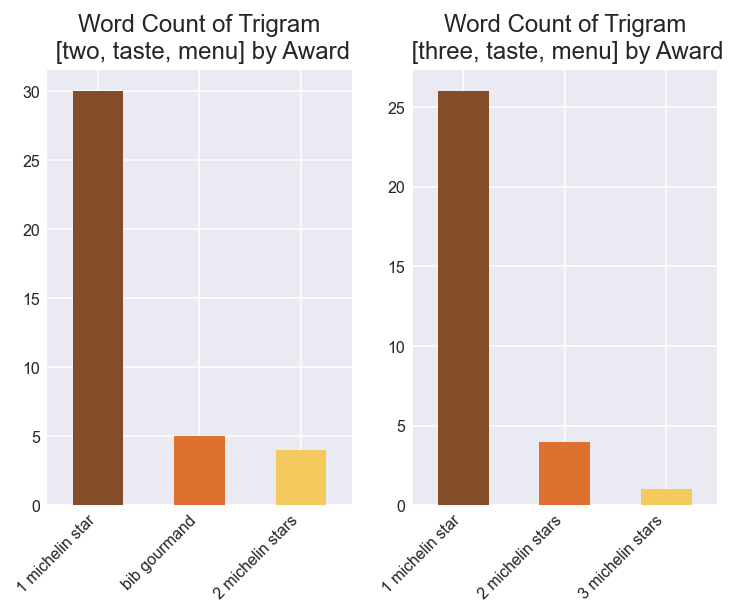

In [449]:
# REVIEWS
viz_two_taste_trigram = two_taste_df['award'].value_counts(sort=True)
Hex_Codes_Earthy = ['#854d27', '#dd7230', '#f4c95d', '#e7e393', '#04030f']

#create a bar plot
plt.subplot(1,2,1)
viz_two_taste_trigram.plot(kind='bar', title='Word Count of Trigram\n [two, taste, menu] by Award', ylabel='',
         xlabel='',fontsize =8, color=Hex_Codes_Earthy)
plt.xticks(rotation=45, ha='right')

# FACILITIES
viz_three_taste_trigram = three_taste_df['award'].value_counts(sort=True)
Hex_Codes_Earthy = ['#854d27', '#dd7230', '#f4c95d', '#e7e393', '#04030f']

#create a bar plot
plt.subplot(1,2,2)
viz_three_taste_trigram.plot(kind='bar', title='Word Count of Trigram\n [three, taste, menu] by Award', ylabel='',
         xlabel='',fontsize =8, color=Hex_Codes_Earthy)
plt.xticks(rotation=45, ha='right')

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [450]:
# Levene

from scipy import stats

t_stat, p_val = stats.levene(award, tri_gram_1, tri_gram_2)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    
else:
    print('equal_var = True (we will assume equal variance)')
    
print('_______________________________________________________________')  
print(f't-stat: {t_stat}')
print(f'p-value: {p_val}')

equal_var = True (we will assume equal variance)
_______________________________________________________________
t-stat: 0.0006138735420503332
p-value: 0.9993863775994478


In [451]:
# Bartlett's

from scipy.stats import bartlett

# Bartlett's test in Python with SciPy:
stat, p_val = bartlett(award, tri_gram_1, tri_gram_2)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    
else:
    print('equal_var = True (we will assume equal variance)')
    
print('_______________________________________________________________')  
print(f'stat: {stat}')
print(f'p-value: {p_val}')

equal_var = True (we will assume equal variance)
_______________________________________________________________
stat: 0.012439875845761218
p-value: 0.9937993658475142


### Test Hypothosis

In [452]:
# Anova Test
import scipy.stats as stats

"""The dependent variable must be a continuous (interval or ratio) level of measurement. 
The independent variables in ANOVA must be categorical (nominal or ordinal) variables. 
Like the t-test, ANOVA is also a parametric test and has some assumptions. 
ANOVA assumes that the data is normally distributed."""

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
f_val, p_val = stats.f_oneway(award, tri_gram_1, tri_gram_2)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

print('-----------------------------------')
print(f'f_val: {f_val}')
print(f'p_val: {p_val}')

Fail to reject the null hypothesis
-----------------------------------
f_val: 0.03439011284255776
p_val: 0.9663835314416852


<div class="alert alert-info">

### Takeaways:

#### Q5. Is there a relationship between Tri-Gram [two, tasting, menu] and award?
#### Q5a. Is there a relationship between Tri-Gram [three, tasting, menu] and award?

### NO there are no significant relationships or dependancies as verified by ANOVA test